# 1.Importing Libraries Files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
train_data = pd.read_csv("data/train-data.csv")

In [3]:
train_data

Unnamed: 0                              Name    Location  Year  \
0              0            Maruti Wagon R LXI CNG      Mumbai  2010   
1              1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2              2                      Honda Jazz V     Chennai  2011   
3              3                 Maruti Ertiga VDI     Chennai  2012   
4              4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
...          ...                               ...         ...   ...   
6014        6014                  Maruti Swift VDI       Delhi  2014   
6015        6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015   
6016        6016             Mahindra Xylo D4 BSIV      Jaipur  2012   
6017        6017                Maruti Wagon R VXI     Kolkata  2013   
6018        6018             Chevrolet Beat Diesel   Hyderabad  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
0                 72000       CNG       Manual      First  26.6 km/kg   
1                 41000    Diesel       Manual      First  19.67 kmpl   
2                 46000    Petrol       Manual      First   18.2 kmpl   
3                 87000    Diesel       Manual      First  20.77 kmpl   
4                 40670    Diesel    Automatic     Second   15.2 kmpl   
...                 ...       ...          ...        ...         ...   
6014              27365    Diesel       Manual      First   28.4 kmpl   
6015             100000    Diesel       Manual      First   24.4 kmpl   
6016              55000    Diesel       Manual     Second   14.0 kmpl   
6017              46000    Petrol       Manual      First   18.9 kmpl   
6018              47000    Diesel       Manual      First  25.44 kmpl   

       Engine      Power   Seats  New_Price    Price  
0      998 CC  58.16 bhp 5.00000        NaN  1.75000  
1     1582 CC  126.2 bhp 5.00000        NaN 12.50000  
2     1199 CC   88.7 bhp 5.00000  8.61 Lakh  4.50000  
3     1248 CC  88.76 bhp 7.00000        NaN  6.00000  
4     1968 CC  140.8 bhp 5.00000        NaN 17.74000  
...       ...        ...     ...        ...      ...  
6014  1248 CC     74 bhp 5.00000  7.88 Lakh  4.75000  
6015  1120 CC     71 bhp 5.00000        NaN  4.00000  
6016  2498 CC    112 bhp 8.00000        NaN  2.90000  
6017   998 CC   67.1 bhp 5.00000        NaN  2.65000  
6018   936 CC   57.6 bhp 5.00000        NaN  2.50000  

[6019 rows x 14 columns]

# 2.Understanding data with descriptive statistics

### 2.1.Peek at the Data

In [4]:
train_data.head()

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power   Seats  New_Price    Price  
0  58.16 bhp 5.00000        NaN  1.75000  
1  126.2 bhp 5.00000        NaN 12.50000  
2   88.7 bhp 5.00000  8.61 Lakh  4.50000  
3  88.76 bhp 7.00000        NaN  6.00000  
4  140.8 bhp 5.00000        NaN 17.74000

In [5]:
train_data.tail()

Unnamed: 0                      Name   Location  Year  \
6014        6014          Maruti Swift VDI      Delhi  2014   
6015        6015  Hyundai Xcent 1.1 CRDi S     Jaipur  2015   
6016        6016     Mahindra Xylo D4 BSIV     Jaipur  2012   
6017        6017        Maruti Wagon R VXI    Kolkata  2013   
6018        6018     Chevrolet Beat Diesel  Hyderabad  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
6014              27365    Diesel       Manual      First   28.4 kmpl   
6015             100000    Diesel       Manual      First   24.4 kmpl   
6016              55000    Diesel       Manual     Second   14.0 kmpl   
6017              46000    Petrol       Manual      First   18.9 kmpl   
6018              47000    Diesel       Manual      First  25.44 kmpl   

       Engine     Power   Seats  New_Price   Price  
6014  1248 CC    74 bhp 5.00000  7.88 Lakh 4.75000  
6015  1120 CC    71 bhp 5.00000        NaN 4.00000  
6016  2498 CC   112 bhp 8.00000        NaN 2.90000  
6017   998 CC  67.1 bhp 5.00000        NaN 2.65000  
6018   936 CC  57.6 bhp 5.00000        NaN 2.50000

In [6]:
train_data.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

### 2.2.Dimensions of the data

In [7]:
train_data.shape

(6019, 14)

### 2.3.Data information for each attribute

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [9]:
train_data.nunique()

Unnamed: 0           6019
Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
New_Price             540
Price                1373
dtype: int64

### 2.4.Checking for null values

In [10]:
train_data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [11]:
train_data.isnull().sum()/train_data.shape[0]*100

Unnamed: 0           0.00000
Name                 0.00000
Location             0.00000
Year                 0.00000
Kilometers_Driven    0.00000
Fuel_Type            0.00000
Transmission         0.00000
Owner_Type           0.00000
Mileage              0.03323
Engine               0.59811
Power                0.59811
Seats                0.69779
New_Price           86.31002
Price                0.00000
dtype: float64

### 2.5.Understanding target variable

In [12]:
train_data.Price.nunique()

1373

In [13]:
train_data.Price.value_counts(ascending=True)

Price
26.76000     1
5.94000      1
12.85000     1
14.85000     1
29.30000     1
            ..
3.25000     71
4.25000     73
3.50000     82
5.50000     84
4.50000     88
Name: count, Length: 1373, dtype: int64

In [14]:
train_data.Price.value_counts().sort_index(ascending=True)

Price
0.44000      1
0.45000      3
0.50000      2
0.51000      1
0.53000      2
            ..
93.67000     1
97.07000     1
100.00000    1
120.00000    1
160.00000    1
Name: count, Length: 1373, dtype: int64

<Axes: >

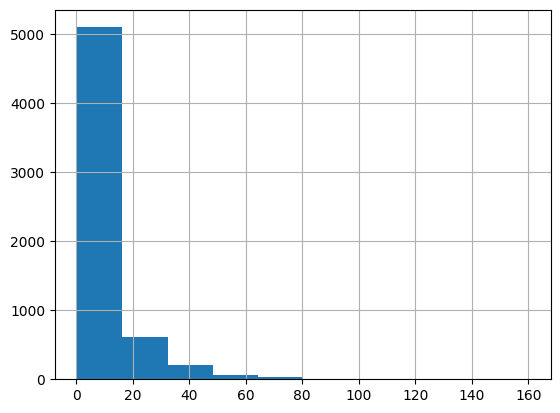

In [15]:
%matplotlib inline
train_data['Price'].hist()

# 3.Data Preparation

In [16]:
train_data.head()

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power   Seats  New_Price    Price  
0  58.16 bhp 5.00000        NaN  1.75000  
1  126.2 bhp 5.00000        NaN 12.50000  
2   88.7 bhp 5.00000  8.61 Lakh  4.50000  
3  88.76 bhp 7.00000        NaN  6.00000  
4  140.8 bhp 5.00000        NaN 17.74000

### 3.1.Preprocessing Mileage

For fuel type and CNG and LPG mileage is measured in km/kg where as for other type it is measured in kmpl. Since those units are in km for both of them, no need of conversion. We will drop the units.

In [17]:
train_data['Mileage'] = train_data['Mileage'].str.rstrip('kmpl')
train_data['Mileage'] = train_data['Mileage'].str.rstrip('km/g')

In [18]:
train_data['Mileage'].unique()

array(['26.6 ', '19.67 ', '18.2 ', '20.77 ', '15.2 ', '21.1 ', '23.08 ',
       '11.36 ', '20.54 ', '22.3 ', '21.56 ', '16.8 ', '25.2 ', '12.7 ',
       '0.0 ', '13.5 ', '25.8 ', '28.4 ', '20.45 ', '14.84 ', '22.69 ',
       '23.65 ', '13.53 ', '18.5 ', '14.4 ', '20.92 ', '17.5 ', '12.8 ',
       '19.01 ', '14.53 ', '11.18 ', '12.4 ', '16.09 ', '14.0 ', '24.3 ',
       '18.15 ', '11.74 ', '22.07 ', '19.7 ', '25.4 ', '25.32 ', '14.62 ',
       '14.28 ', '14.9 ', '11.25 ', '24.4 ', '16.55 ', '17.11 ', '22.9 ',
       '17.8 ', '18.9 ', '15.04 ', '25.17 ', '20.36 ', '13.29 ', '13.68 ',
       '20.0 ', '15.8 ', '25.0 ', '16.4 ', '24.52 ', '22.1 ', '8.5 ',
       '15.1 ', '16.95 ', '19.64 ', '16.5 ', '18.53 ', '17.57 ', '18.0 ',
       '23.2 ', '16.73 ', '17.0 ', '13.0 ', '17.68 ', '22.7 ', '16.2 ',
       '15.26 ', '23.0 ', '19.83 ', '14.94 ', '17.71 ', '14.74 ', '16.0 ',
       '22.32 ', '12.99 ', '23.3 ', '19.15 ', '10.8 ', '15.0 ', '22.0 ',
       '21.9 ', '12.05 ', '11.7 ', '21.21 ', '2

In [19]:
train_data['Mileage'].value_counts().sort_index(ascending=True)

Mileage
0.0       68
10.0      10
10.1       7
10.13      3
10.2       6
          ..
9.52       2
9.7        1
9.74       2
9.8        4
9.9        3
Name: count, Length: 430, dtype: int64

There are zeros in values. Mileage can not be 0, so checking how many values are 0 to further treat them.

In [20]:
train_data['Mileage'] = train_data['Mileage'].astype('float')

In [21]:
train_data.query('Mileage == 0.0')['Mileage']

14     0.00000
67     0.00000
79     0.00000
194    0.00000
229    0.00000
         ...  
5647   0.00000
5875   0.00000
5943   0.00000
5972   0.00000
6011   0.00000
Name: Mileage, Length: 68, dtype: float64

There are 68 zero values in Mileage column.

In [22]:
# We will replace them with NAN so that we can handle them in missing value treatment
train_data.loc[train_data["Mileage"]==0.0,'Mileage']=np.nan

In [23]:
train_data['Mileage'].isna().sum()

np.int64(70)

### 3.2.Preprocessing Engine

In [24]:
train_data['Engine'] = train_data['Engine'].str.rstrip('CC')

In [25]:
train_data['Engine'].unique()

array(['998 ', '1582 ', '1199 ', '1248 ', '1968 ', '814 ', '1461 ',
       '2755 ', '1598 ', '1462 ', '1497 ', '2179 ', '2477 ', '1498 ',
       '2143 ', '1995 ', '1984 ', '1197 ', '2494 ', '1798 ', '2696 ',
       '2698 ', '1061 ', '1198 ', '2987 ', '796 ', '624 ', '1999 ',
       '1991 ', '2694 ', '1120 ', '2498 ', '799 ', '2393 ', '1399 ',
       '1796 ', '2148 ', '1396 ', '1950 ', '4806 ', '1998 ', '1086 ',
       '1193 ', '2982 ', '1493 ', '2967 ', '2993 ', '1196 ', '1799 ',
       '2497 ', '2354 ', '1373 ', '2996 ', '1591 ', '2894 ', '5461 ',
       '1595 ', '936 ', '1997 ', nan, '1896 ', '1390 ', '1364 ', '2199 ',
       '993 ', '999 ', '1405 ', '2956 ', '1794 ', '995 ', '2496 ',
       '1599 ', '2400 ', '1495 ', '2523 ', '793 ', '4134 ', '1596 ',
       '1395 ', '2953 ', '1586 ', '2362 ', '1496 ', '1368 ', '1298 ',
       '1956 ', '1299 ', '3498 ', '2835 ', '1150 ', '3198 ', '1343 ',
       '1499 ', '1186 ', '1590 ', '2609 ', '2499 ', '2446 ', '1978 ',
       '2360 ', '3436 ', 

In [26]:
train_data['Engine'].value_counts().sort_index(ascending=True)

Engine
1047       4
1061      30
1086     108
1120      54
1150       7
        ... 
970        1
993       14
995       10
998      259
999       29
Name: count, Length: 146, dtype: int64

### 3.3.Preprocessing Power

In [27]:
train_data['Power'] = train_data['Power'].str.rstrip('bhp')

In [28]:
train_data['Power'].unique()

array(['58.16 ', '126.2 ', '88.7 ', '88.76 ', '140.8 ', '55.2 ', '63.1 ',
       '171.5 ', '103.6 ', '74 ', '103.25 ', '116.3 ', '187.7 ', '115 ',
       '175.56 ', '98.6 ', '83.8 ', '167.62 ', '190 ', '88.5 ', '177.01 ',
       '80 ', '67.1 ', '102 ', '108.45 ', '138.1 ', '184 ', '179.5 ',
       '103.5 ', '64 ', '82 ', '254.8 ', '73.9 ', '46.3 ', '37.5 ', '77 ',
       '82.9 ', '149.92 ', '138.03 ', '112.2 ', '163.7 ', '71 ', '105 ',
       '174.33 ', '75 ', '103.2 ', '53.3 ', '78.9 ', '147.6 ', '147.8 ',
       '68 ', '186 ', '170 ', '69 ', '140 ', '78 ', '194 ', '500 ',
       '108.5 ', '86.8 ', '187.74 ', 'null ', '132 ', '86.7 ', '73.94 ',
       '117.3 ', '218 ', '168.5 ', '89.84 ', '110 ', '90 ', '82.85 ',
       '67 ', '241.4 ', '35 ', '270.9 ', '126.32 ', '73 ', '130 ',
       '100.6 ', '150 ', '75.94 ', '215 ', '107.3 ', '37.48 ', '120 ',
       '178 ', '152 ', '91.1 ', '85.80 ', '362.07 ', '121.3 ', '143 ',
       '81.80 ', '171 ', '76.8 ', '103.52 ', '444 ', '362.9 ', '67.

In [29]:
train_data['Power'].value_counts().sort_index(ascending=True)

Power
100        55
100.6      39
101         4
102        57
102.5       8
         ... 
98.82       2
98.96       9
99         18
99.6        5
null      107
Name: count, Length: 372, dtype: int64

There are values which are null in Power column

In [30]:
# We will replace those with NAN so that can be handlied while treating missing values
train_data['Power'] = train_data['Power'].replace(regex="null", value = np.nan)

In [31]:
train_data['Power'].isna().sum()

np.int64(143)

### 3.4.Preprocessing Seats

In [32]:
train_data['Seats'].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

Array shows that there is one vehicle with 0 seats which cannot be true

In [33]:
# we will change 0 to NAN and will handle it while treating missing values.
train_data.query("Seats == 0.0")['Seats']

3999   0.00000
Name: Seats, dtype: float64

In [34]:
train_data['Seats'].isna().sum()

np.int64(42)

There are values which are null in Seats of train

In [35]:
#  We will replace those with NAN so that can be handlied while treating missing values
train_data.loc[3999,'Seats'] =np.nan

In [36]:
train_data['Seats'].isna().sum()

np.int64(43)

### 3.5.Preprocessing New_Price

In [37]:
train_data['New_Price'].unique()

array([nan, '8.61 Lakh', '21 Lakh', '10.65 Lakh', '32.01 Lakh',
       '47.87 Lakh', '10.57 Lakh', '12.33 Lakh', '11.12 Lakh',
       '23.64 Lakh', '18.64 Lakh', '19.34 Lakh', '49.14 Lakh',
       '11.81 Lakh', '16.65 Lakh', '6.67 Lakh', '6.45 Lakh', '6.41 Lakh',
       '27 Lakh', '5.13 Lakh', '54.43 Lakh', '9.51 Lakh', '9.96 Lakh',
       '14.44 Lakh', '4.53 Lakh', '95.04 Lakh', '13.49 Lakh', '1.28 Cr',
       '60.88 Lakh', '7.39 Lakh', '69.47 Lakh', '8.78 Lakh', '12.74 Lakh',
       '10.52 Lakh', '11.98 Lakh', '8.54 Lakh', '33.58 Lakh', '9.12 Lakh',
       '5.29 Lakh', '44.28 Lakh', '20.74 Lakh', '11.74 Lakh',
       '25.52 Lakh', '14.07 Lakh', '95.13 Lakh', '8.34 Lakh', '8.85 Lakh',
       '25.4 Lakh', '16.67 Lakh', '79.43 Lakh', '6.62 Lakh', '1.04 Cr',
       '58.67 Lakh', '28.37 Lakh', '4.48 Lakh', '72.64 Lakh',
       '36.15 Lakh', '44.59 Lakh', '12 Lakh', '14.65 Lakh', '53.72 Lakh',
       '33.91 Lakh', '12.51 Lakh', '9.74 Lakh', '95.38 Lakh',
       '60.59 Lakh', '11.28 Lakh', 

There are few values which are in Cr so we need to convert those in lakhs.

In [38]:
import re
New_Price_Lakhs = []

# Regex for numeric + " " + "Lakh"  format
regex_lakh = "^\d+(\.\d+)? Lakh$"

for value in train_data["New_Price"]:
    if isinstance(value, str):
        if re.match(regex_lakh, value):
            New_Price_Lakhs.append(float(value.split(" ")[0]))
        else:
            # Converting values in Crore to lakhs
            New_Price_Lakhs.append(float(value.split(" ")[0]) * 100)
    else:
        # If there are any missing values in the New_Price column, we add missing values to the new column
        New_Price_Lakhs.append(np.nan)

 # Adding the new column to the data
train_data["New_Price_Lakhs"] =  New_Price_Lakhs

# Checking the new dataframe
train_data.head()

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage Engine  \
0              72000       CNG       Manual      First 26.60000   998    
1              41000    Diesel       Manual      First 19.67000  1582    
2              46000    Petrol       Manual      First 18.20000  1199    
3              87000    Diesel       Manual      First 20.77000  1248    
4              40670    Diesel    Automatic     Second 15.20000  1968    

    Power   Seats  New_Price    Price  New_Price_Lakhs  
0  58.16  5.00000        NaN  1.75000              NaN  
1  126.2  5.00000        NaN 12.50000              NaN  
2   88.7  5.00000  8.61 Lakh  4.50000          8.61000  
3  88.76  7.00000        NaN  6.00000              NaN  
4  140.8  5.00000        NaN 17.74000              NaN

In [39]:
train_data['New_Price_Lakhs'].value_counts().sort_index(ascending=True)

New_Price_Lakhs
3.91000      2
3.95000      1
3.96000      1
3.98000      1
4.04000      2
            ..
140.00000    1
160.00000    1
166.00000    1
171.00000    1
230.00000    1
Name: count, Length: 540, dtype: int64

### 3.6.Deriving Age feature from Year feature

Age of the used car affects its Price. So we will derive Age feature from Year feature.

In [40]:
train_data['Current_year'] =2023
train_data['Age_of_car'] = train_data['Current_year'] - train_data['Year']
train_data.drop('Current_year', axis = 1, inplace = True)
#train_data.drop('Year', axis = 1, inplace = True)
train_data.head()

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage Engine  \
0              72000       CNG       Manual      First 26.60000   998    
1              41000    Diesel       Manual      First 19.67000  1582    
2              46000    Petrol       Manual      First 18.20000  1199    
3              87000    Diesel       Manual      First 20.77000  1248    
4              40670    Diesel    Automatic     Second 15.20000  1968    

    Power   Seats  New_Price    Price  New_Price_Lakhs  Age_of_car  
0  58.16  5.00000        NaN  1.75000              NaN          13  
1  126.2  5.00000        NaN 12.50000              NaN           8  
2   88.7  5.00000  8.61 Lakh  4.50000          8.61000          12  
3  88.76  7.00000        NaN  6.00000              NaN          11  
4  140.8  5.00000        NaN 17.74000              NaN          10

 ### 3.7.Deriving Brand and Model of car from Name variable

Brand and Model of the used car affects its Price.

In [41]:
train_df = train_data['Name'].str.split(" ", n = 1, expand = True)

# making separate brand column from new data frame
train_data['Brand']= train_df[0]

# making separate Model column from new data frame
train_data['Model']= train_df[1]

train_data.head()

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage Engine  \
0              72000       CNG       Manual      First 26.60000   998    
1              41000    Diesel       Manual      First 19.67000  1582    
2              46000    Petrol       Manual      First 18.20000  1199    
3              87000    Diesel       Manual      First 20.77000  1248    
4              40670    Diesel    Automatic     Second 15.20000  1968    

    Power   Seats  New_Price    Price  New_Price_Lakhs  Age_of_car    Brand  \
0  58.16  5.00000        NaN  1.75000              NaN          13   Maruti   
1  126.2  5.00000        NaN 12.50000              NaN           8  Hyundai   
2   88.7  5.00000  8.61 Lakh  4.50000          8.61000          12    Honda   
3  88.76  7.00000        NaN  6.00000              NaN          11   Maruti   
4  140.8  5.00000        NaN 17.74000              NaN          10     Audi   

                        Model  
0             Wagon R LXI CNG  
1    Creta 1.6 CRDi SX Option  
2                      Jazz V  
3                  Ertiga VDI  
4  A4 New 2.0 TDI Multitronic

In [42]:
train_data['Brand'].nunique()

31

In [43]:
train_data['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [44]:
train_data.loc[train_data.Brand == 'ISUZU', 'Brand'] = 'Isuzu'
train_data.loc[train_data.Brand == 'Land', 'Brand'] = 'Land Rover'
train_data.loc[train_data.Brand == 'Mini', 'Brand'] = 'Mini Cooper'

While checking Brand names, it can be seen that Isuzu and ISUZU are same. Land must be Land Rover, Mini must be Mini Cooper. So we need to correct these brand names

In [45]:
train_data['Brand'].nunique()

30

In [46]:
train_data['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land Rover', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini Cooper', 'Fiat',
       'Jeep', 'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

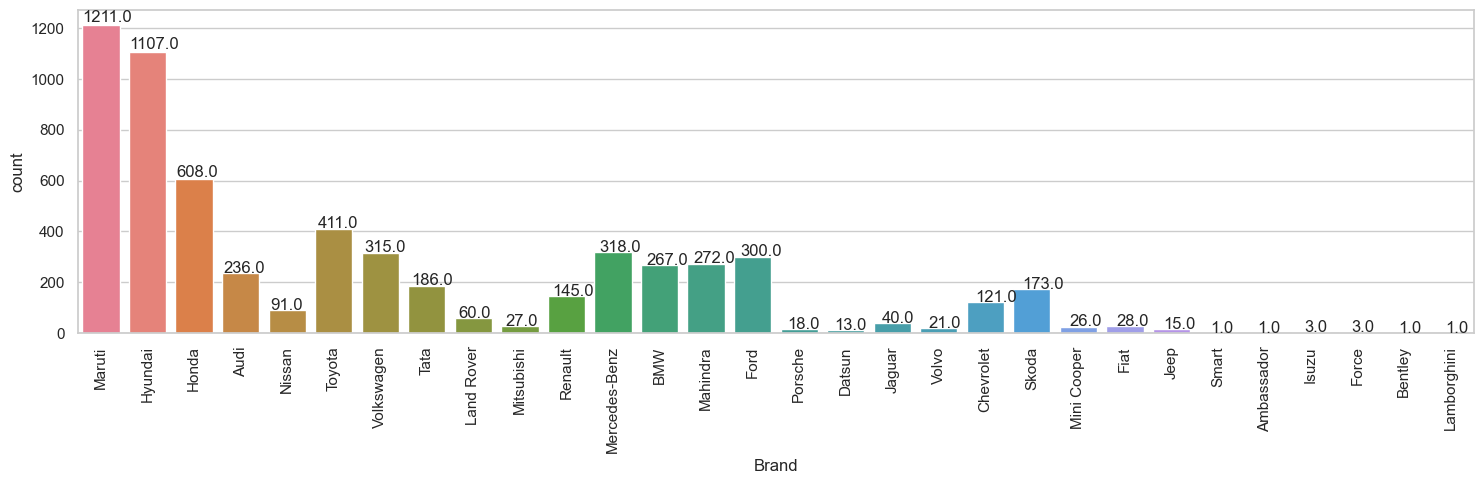

In [47]:
# Restore default Seaborn theme and colors
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(15, 5))

# ADD the palette parameter here
sns.countplot(x='Brand', data=train_data, ax=ax, palette='husl')  # <- this makes it colorful

# Annotate bar heights
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.010, p.get_height() * 1.010))

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

There are 30 unique Brands in the dataset.Maruti brand is most available for purchase/Sold followed by Hyundai.

### 3.8.Deriving Brand class from Brand variable.

In [48]:
train_data['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land Rover', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini Cooper', 'Fiat',
       'Jeep', 'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [49]:
train_data['Brand'].nunique()

30

In [50]:
Low_class = ['Maruti', 'Hyundai', 'Honda', 'Toyota', 'Tata', 'Mitsubishi', 'Renault', 'Mahindra', 'Ford',
             'Datsun', 'Chevrolet', 'Skoda', 'Fiat', 'Smart', 'Ambassador', 'Isuzu', 'Force']
High_class = ['Audi', 'Nissan', 'Volkswagen', 'Land Rover', 'Mercedes-Benz', 'BMW', 'Porsche',
              'Jaguar', 'Volvo', 'Mini Cooper','Jeep', 'Bentley', 'Lamborghini']
print(len(Low_class))
print(len(High_class))

17
13


In [51]:
def class_of_Brand(x):
    if x in Low_class:
        return "Low_class"
    else:
        return "High_class"

In [52]:
train_data['Class_of_Brand'] = train_data['Brand'].apply(lambda x: class_of_Brand(x))
train_data.head()

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage Engine  \
0              72000       CNG       Manual      First 26.60000   998    
1              41000    Diesel       Manual      First 19.67000  1582    
2              46000    Petrol       Manual      First 18.20000  1199    
3              87000    Diesel       Manual      First 20.77000  1248    
4              40670    Diesel    Automatic     Second 15.20000  1968    

    Power   Seats  New_Price    Price  New_Price_Lakhs  Age_of_car    Brand  \
0  58.16  5.00000        NaN  1.75000              NaN          13   Maruti   
1  126.2  5.00000        NaN 12.50000              NaN           8  Hyundai   
2   88.7  5.00000  8.61 Lakh  4.50000          8.61000          12    Honda   
3  88.76  7.00000        NaN  6.00000              NaN          11   Maruti   
4  140.8  5.00000        NaN 17.74000              NaN          10     Audi   

                        Model Class_of_Brand  
0             Wagon R LXI CNG      Low_class  
1    Creta 1.6 CRDi SX Option      Low_class  
2                      Jazz V      Low_class  
3                  Ertiga VDI      Low_class  
4  A4 New 2.0 TDI Multitronic     High_class

### 3.9.Converting datatypes

In [53]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            5949 non-null   float64
 9   Engine             5983 non-null   object 
 10  Power              5876 non-null   object 
 11  Seats              5976 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
 14  New_Price_Lakhs    824 non-null    float64
 15  Age_of_car         6019 non-null   int64  
 16  Brand              6019 

In [54]:
train_data['Location'] = train_data['Location'].astype('category')
train_data['Fuel_Type'] = train_data['Fuel_Type'].astype('category')
train_data['Transmission'] = train_data['Transmission'].astype('category')
train_data['Owner_Type'] = train_data['Owner_Type'].astype('category')
train_data['Class_of_Brand'] = train_data['Class_of_Brand'].astype('category')

#converting numeric object data type to float data type
train_data['Engine'] = train_data['Engine'].astype('float')
train_data['Power'] = train_data['Power'].astype('float')

In [55]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Unnamed: 0         6019 non-null   int64   
 1   Name               6019 non-null   object  
 2   Location           6019 non-null   category
 3   Year               6019 non-null   int64   
 4   Kilometers_Driven  6019 non-null   int64   
 5   Fuel_Type          6019 non-null   category
 6   Transmission       6019 non-null   category
 7   Owner_Type         6019 non-null   category
 8   Mileage            5949 non-null   float64 
 9   Engine             5983 non-null   float64 
 10  Power              5876 non-null   float64 
 11  Seats              5976 non-null   float64 
 12  New_Price          824 non-null    object  
 13  Price              6019 non-null   float64 
 14  New_Price_Lakhs    824 non-null    float64 
 15  Age_of_car         6019 non-null   int64   
 16  Brand 

## 4.Data Cleaning

### 4.1.Identify and delete Columns that Contain a Single Value

In [56]:
columns_no_varience = []
for col in train_data.columns:
    if len(train_data[col].unique()) ==1:
        columns_no_varience.append(col)
        train_data.drop([col], axis = 1, inplace = True)
print(columns_no_varience)
print (train_data.shape)

[]
(6019, 19)


### 4.2.Consider and remove Columns That Have Very Few Values i.e. a low variance

In [57]:
train_data_numerical_columns = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Age_of_car']
columns_with_low_variance = []
for col in train_data_numerical_columns:
    if train_data[col].var()<=0.5:
        columns_with_low_variance.append(col)
        train_data.drop([col], axis = 1, inplace = True)
print(columns_with_low_variance)
print(train_data.shape)

[]
(6019, 19)


### 4.3.Identify and delete Rows that Contain Duplicate Data

In [58]:
duplicate_rows = train_data.duplicated()
print(duplicate_rows.any())
train_data.drop_duplicates(inplace = True)
print(train_data.shape)

False
(6019, 19)


In [59]:
## Checking For Duplicated Rows in Data
train_data.duplicated().sum()

np.int64(0)

### 4.4.Outlier detection and treatment

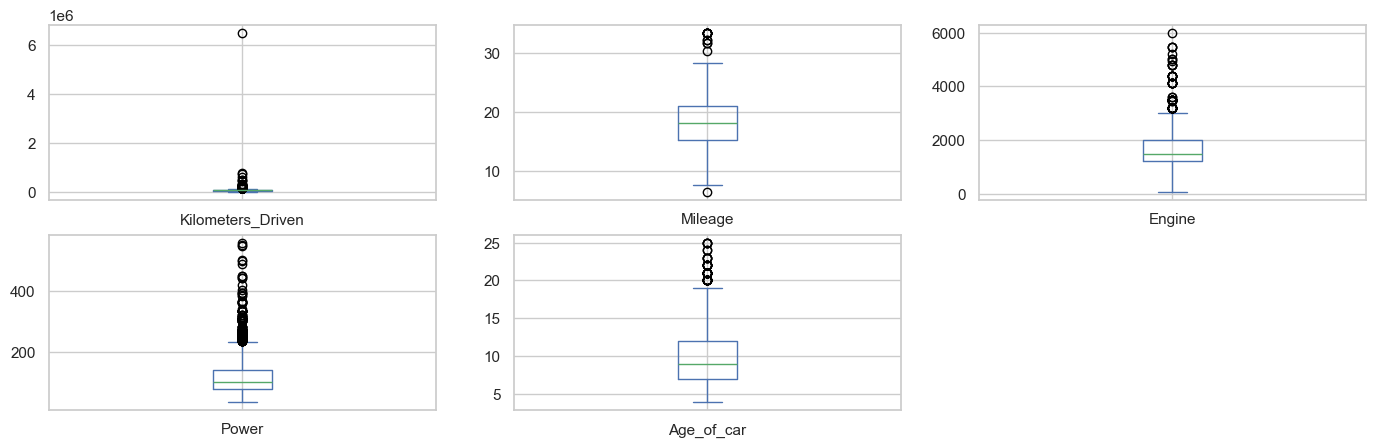

In [60]:
train_data[['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Age_of_car']].plot(kind = 'box',
                                                                        subplots = True, layout = (2,3), figsize = (17,5))
plt.show()

In [61]:
train_data_numerical_columns = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Age_of_car']
for column in train_data_numerical_columns:
    Q1 = train_data[column].quantile(0.25)
    Q3 = train_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = [x for x in train_data[column] if x < lower or x > upper]
    print(column)
    print('Identified outliers: %d' % len(outliers))
    print('*'*40)

Kilometers_Driven
Identified outliers: 202
****************************************
Mileage
Identified outliers: 15
****************************************
Engine
Identified outliers: 61
****************************************
Power
Identified outliers: 238
****************************************
Age_of_car
Identified outliers: 50
****************************************


In [62]:
train_data_numerical_columns = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Age_of_car']
for column in train_data_numerical_columns:
    print('Skewness of', column, 'before outlier treatment: ', train_data[column].skew())

Skewness of Kilometers_Driven before outlier treatment:  58.72466188582937
Skewness of Mileage before outlier treatment:  0.21068656169715658
Skewness of Engine before outlier treatment:  1.421473940493876
Skewness of Power before outlier treatment:  1.916480719635821
Skewness of Age_of_car before outlier treatment:  0.8458021355295817


In [63]:
train_data_numerical_columns = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Age_of_car']
for column in train_data_numerical_columns:
    print('Maximum value in', column, 'before outlier treatment: ', train_data[column].max())

Maximum value in Kilometers_Driven before outlier treatment:  6500000
Maximum value in Mileage before outlier treatment:  33.54
Maximum value in Engine before outlier treatment:  5998.0
Maximum value in Power before outlier treatment:  560.0
Maximum value in Age_of_car before outlier treatment:  25


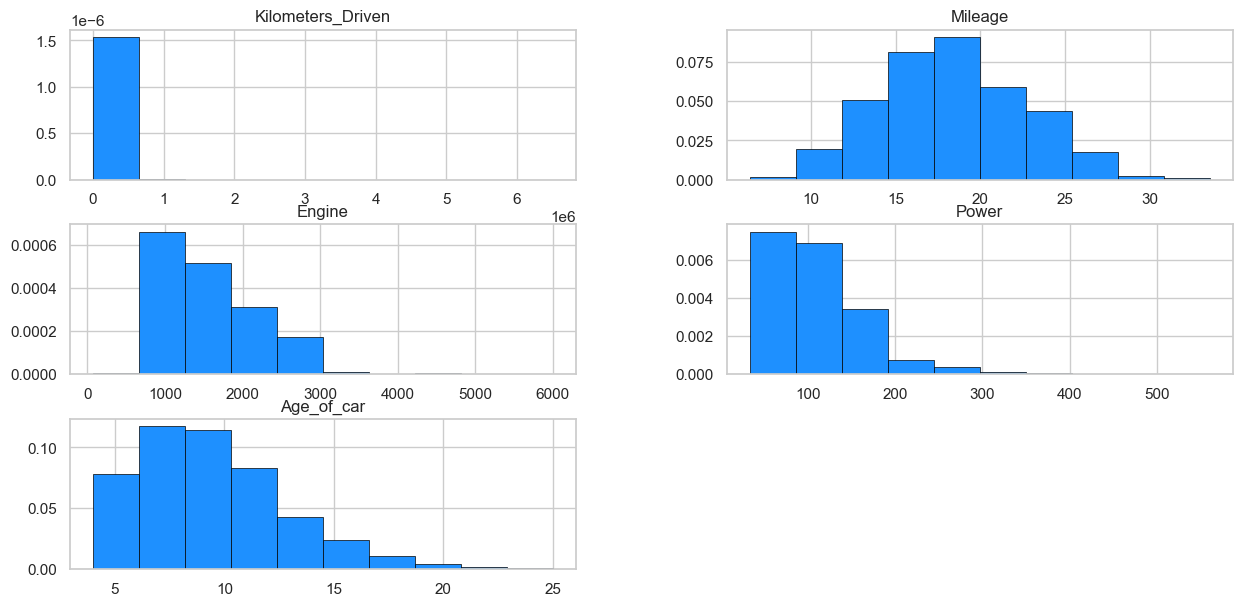

In [64]:
train_data[['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Age_of_car']].hist (figsize = (15,7),
       color = 'dodgerblue', density = True, edgecolor = 'black', linewidth = 0.5 )
plt.show()

As can be seen from skewness and histograms of numerical features, we need to treat outliers in Kilometers_Driven column only.

There is one outlier which is far away from the remaining values. We will replace it with the nearest value.

In [65]:
train_data.Kilometers_Driven.sort_values(ascending=False)

2328    6500000
340      775000
1860     720000
358      620000
2823     480000
         ...   
1242       1000
5339       1000
1198       1000
5606        600
1361        171
Name: Kilometers_Driven, Length: 6019, dtype: int64

In [66]:
train_data['Kilometers_Driven'][train_data['Kilometers_Driven'] == 6500000]= 775000

In [67]:
train_data.Kilometers_Driven.sort_values(ascending=False)

340     775000
2328    775000
1860    720000
358     620000
2823    480000
         ...  
1242      1000
5339      1000
1198      1000
5606       600
1361       171
Name: Kilometers_Driven, Length: 6019, dtype: int64

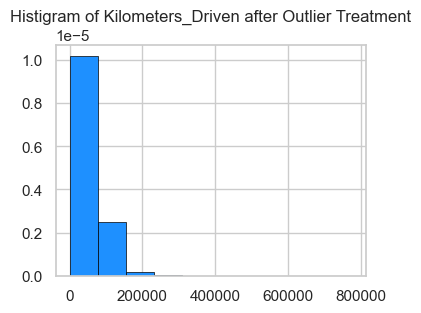

In [68]:
train_data['Kilometers_Driven'].hist (color = 'dodgerblue', density = True, edgecolor = 'black', linewidth = 0.5, figsize = (4, 3))
plt.title('Histigram of Kilometers_Driven after Outlier Treatment')
plt.show()

We are successful in reducing skewness of Kilometers_Driven column in the most logical way.

### 4.5.Missing Value Treatment

In [69]:
train_data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                70
Engine                 36
Power                 143
Seats                  43
New_Price            5195
Price                   0
New_Price_Lakhs      5195
Age_of_car              0
Brand                   0
Model                   0
Class_of_Brand          0
dtype: int64

In [70]:
print('Percentage of Missing values:')
print('-----------------------------')
train_data.isnull().sum()/len(train_data)*100

Percentage of Missing values:
-----------------------------


Unnamed: 0           0.00000
Name                 0.00000
Location             0.00000
Year                 0.00000
Kilometers_Driven    0.00000
Fuel_Type            0.00000
Transmission         0.00000
Owner_Type           0.00000
Mileage              1.16298
Engine               0.59811
Power                2.37581
Seats                0.71440
New_Price           86.31002
Price                0.00000
New_Price_Lakhs     86.31002
Age_of_car           0.00000
Brand                0.00000
Model                0.00000
Class_of_Brand       0.00000
dtype: float64

#### 4.5.1.Handling missing data in Mileage column

The Mileage of the car is affected by the Name of car and manufacturing year of the car.

In [71]:
train_data['Mileage'].isna().sum()

np.int64(70)

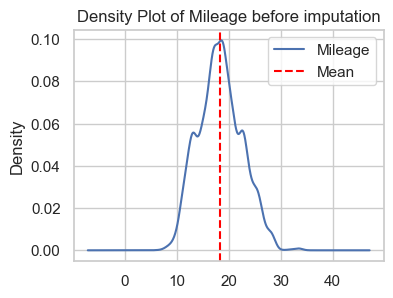

In [72]:
train_data['Mileage'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Mileage before imputation')
plt.axvline(x=train_data['Mileage'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [73]:
Skewness_of_Mileage_with_missing_values = train_data['Mileage'].skew()

In [74]:
train_data['Mileage']=train_data.groupby(['Name','Year'], group_keys=False)['Mileage'].apply(lambda x:x.fillna(x.median()))
train_data['Mileage'].isna().sum()

np.int64(69)

In [75]:
train_data['Mileage'].isna().sum()

np.int64(69)

In [76]:
train_data['Mileage']=train_data.groupby(['Model','Year'], group_keys=False)['Mileage'].apply(lambda x:x.fillna(x.median()))

In [77]:
train_data['Mileage'].isna().sum()

np.int64(69)

In [78]:
train_data['Mileage']=train_data.groupby(['Name'], group_keys=False)['Mileage'].apply(lambda x:x.fillna(x.median()))
train_data['Mileage'].isna().sum()

np.int64(67)

In [79]:
train_data['Mileage'].isna().sum()

np.int64(67)

In [80]:
train_data['Mileage']=train_data.groupby(['Brand'], group_keys=False)['Mileage'].apply(lambda x:x.fillna(x.median()))
train_data['Mileage'].isna().sum()

np.int64(1)

In [81]:
train_data['Mileage'].isna().sum()

np.int64(1)

In [82]:
train_data['Mileage'] = train_data['Mileage'].fillna(train_data['Mileage'].median())
train_data['Mileage'].isna().sum()

np.int64(0)

In [83]:
train_data['Mileage'].isna().sum()

np.int64(0)

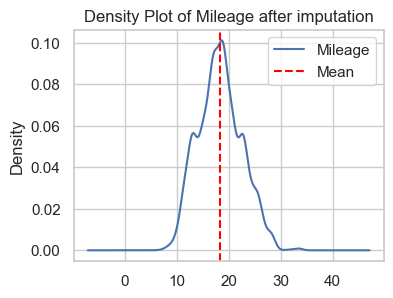

In [84]:
train_data['Mileage'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Mileage after imputation')
plt.axvline(x=train_data['Mileage'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()


As can be seen from density plots of Mileage column before and after imputation, there is not much change in the shapes of density curves.

#### 4.5.2.Handling missing data in Engine column

In [85]:
train_data['Engine'].isna().sum()

np.int64(36)

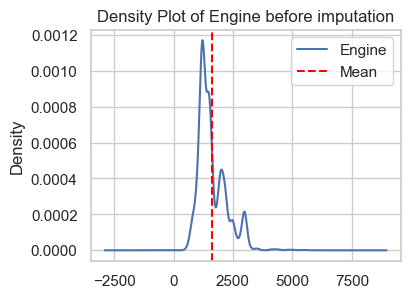

In [86]:
train_data['Engine'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Engine before imputation')
plt.axvline(x=train_data['Engine'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [87]:
Skewness_of_Engine_with_missing_values = train_data['Engine'].skew()

In [88]:
train_data['Engine'] = train_data.groupby(['Name','Year'], group_keys=False)['Engine'].apply(lambda x: x.fillna(x.median()))

In [89]:
train_data['Engine'].isna().sum()

np.int64(35)

In [90]:
train_data['Engine'] = train_data.groupby(['Brand', 'Year'], group_keys=False)['Engine'].apply(lambda x: x.fillna(x.median()))

In [91]:
train_data['Engine'].isna().sum()

np.int64(5)

In [92]:
train_data['Engine'] = train_data.groupby(['Brand'], group_keys=False)['Engine'].apply(lambda x: x.fillna(x.median()))

In [93]:
train_data['Engine'].isna().sum()

np.int64(0)

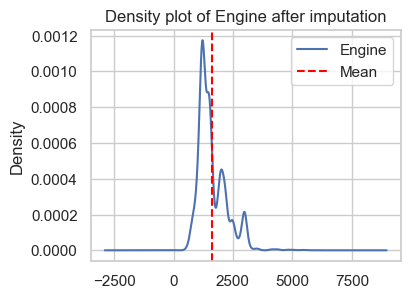

In [94]:
train_data['Engine'].plot(kind = 'density', figsize = (4, 3))
plt.title('Density plot of Engine after imputation')
plt.axvline(x=train_data['Engine'].mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.legend()
plt.show()

In [95]:
Skewness_of_Engine_without_missing_values = train_data['Engine'].skew()

In [96]:
print('Skewness of Engine with missing values: ', Skewness_of_Engine_with_missing_values)
print('Skewness of Engine after treating missing values: ', Skewness_of_Engine_without_missing_values)

Skewness of Engine with missing values:  1.421473940493876
Skewness of Engine after treating missing values:  1.4226173541030371


As can be seen from density plots of Engine column before and after imputation, there is not much change in the shapes of density curves.

#### 4.5.3.Handling missing data in Power column

The Power of the car is affected by the Name of car and manufacturing year of the car. So we will use these variables while imputing missing values of power.

In [97]:
train_data['Power'].isna().sum()

np.int64(143)

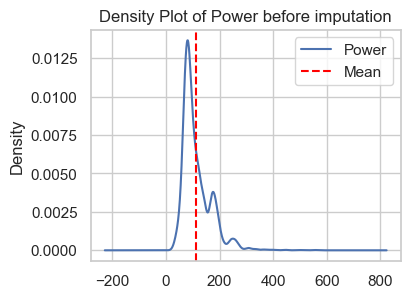

In [98]:
train_data['Power'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Power before imputation')
plt.axvline(x=train_data['Power'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [99]:
Skewness_of_Power_with_missing_values = train_data['Power'].skew()

In [100]:
train_data['Power'] = train_data.groupby(['Name','Year'], group_keys=False)['Power'].apply(lambda x: x.fillna(x.median()))

In [101]:
train_data['Power'].isna().sum()

np.int64(132)

In [102]:
train_data['Power'] = train_data.groupby(['Brand','Year'], group_keys=False)['Power'].apply(lambda x: x.fillna(x.median()))

In [103]:
train_data['Power'].isna().sum()

np.int64(16)

In [104]:
train_data['Power'] = train_data.groupby(['Name'], group_keys=False)['Power'].apply(lambda x: x.fillna(x.median()))

In [105]:
train_data['Power'].isna().sum()

np.int64(15)

In [106]:
train_data['Power'] = train_data.groupby(['Brand'], group_keys=False)['Power'].apply(lambda x: x.fillna(x.median()))

In [107]:
train_data['Power'].isna().sum()

np.int64(1)

In [108]:
train_data['Power'] = train_data['Power'].fillna(train_data['Power'].median())

In [109]:
train_data['Power'].isna().sum()

np.int64(0)

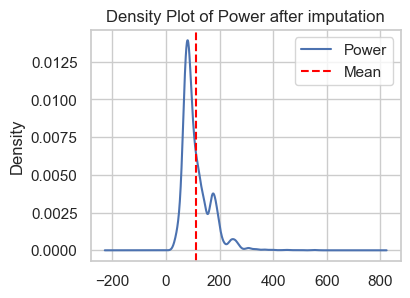

In [110]:
train_data['Power'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Power after imputation')
plt.axvline(x=train_data['Power'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [111]:
Skewness_of_Power_without_missing_values = train_data['Power'].skew()

In [112]:
print('Skewness of Power with missing values: ', Skewness_of_Power_with_missing_values)
print('Skewness of Power after treating missing values: ', Skewness_of_Power_without_missing_values)

Skewness of Power with missing values:  1.916480719635821
Skewness of Power after treating missing values:  1.956940592329653


As can be seen from density plots of Power column before and after imputation, there is not much change in the shapes of density curves.

#### 4.5.4.Handling missing data in Seats column

The number of seats are dependent upon the car Name. So we will impute the missing values based on Name.

In [113]:
train_data['Seats'].isna().sum()

np.int64(43)

In [114]:
train_data['Seats']=train_data.groupby(['Name'], group_keys=False)['Seats'].apply(lambda x:x.fillna(x.mode()))

In [115]:
train_data['Seats'].isna().sum()

np.int64(43)

In [116]:
Seats_missing = pd.DataFrame(train_data[train_data['Seats'].isna()].Name.value_counts())
Seats_missing.reset_index(inplace=True)
Seats_missing.rename(columns={'index':'name'}, inplace=True)
Seats_missing.rename(columns={'Name':'Rows with NAN value'}, inplace=True)
Seats_missing.rename(columns={'name':'Name'}, inplace=True)
Seats_missing

Rows with NAN value  count
0                           Maruti Swift 1.3 VXi      6
1                        BMW 5 Series 520d Sedan      5
2                Hyundai Santro GLS II - Euro II      4
3                             Honda City 1.5 GXI      3
4                              Maruti Estilo LXI      3
5                           Maruti Swift 1.3 LXI      2
6                   Land Rover Range Rover 3.0 D      2
7                         Hyundai Santro Xing XG      2
8                             Honda City 1.5 EXI      1
9   Land Rover Range Rover Sport 2005 2012 Sport      1
10                          Maruti Swift 1.3 ZXI      1
11                             Honda City 1.3 DX      1
12                              Ford Figo Diesel      1
13                      Maruti Swift 1.3 VXI ABS      1
14                     Hyundai Santro LP zipPlus      1
15                           Toyota Etios Liva V      1
16                             Maruti Wagon R Vx      1
17                   Ford Endeavour Hurricane LE      1
18             Audi A4 3.2 FSI Tiptronic Quattro      1
19                   Honda CR-V AT With Sun Roof      1
20                        Fiat Punto 1.3 Emotion      1
21                     Honda Jazz Select Edition      1
22                        Fiat Punto 1.2 Dynamic      1
23                        Fiat Punto 1.4 Emotion      1

In [117]:
# Adding a new column Seats_new to Seats missing dataframe based on domain knowledge
Seats_missing['No._of_Seats'] = [5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5]
Seats_missing

Rows with NAN value  count  No._of_Seats
0                           Maruti Swift 1.3 VXi      6             5
1                        BMW 5 Series 520d Sedan      5             5
2                Hyundai Santro GLS II - Euro II      4             5
3                             Honda City 1.5 GXI      3             5
4                              Maruti Estilo LXI      3             5
5                           Maruti Swift 1.3 LXI      2             5
6                   Land Rover Range Rover 3.0 D      2             5
7                         Hyundai Santro Xing XG      2             5
8                             Honda City 1.5 EXI      1             5
9   Land Rover Range Rover Sport 2005 2012 Sport      1             7
10                          Maruti Swift 1.3 ZXI      1             5
11                             Honda City 1.3 DX      1             5
12                              Ford Figo Diesel      1             5
13                      Maruti Swift 1.3 VXI ABS      1             5
14                     Hyundai Santro LP zipPlus      1             5
15                           Toyota Etios Liva V      1             5
16                             Maruti Wagon R Vx      1             5
17                   Ford Endeavour Hurricane LE      1             6
18             Audi A4 3.2 FSI Tiptronic Quattro      1             5
19                   Honda CR-V AT With Sun Roof      1             5
20                        Fiat Punto 1.3 Emotion      1             5
21                     Honda Jazz Select Edition      1             5
22                        Fiat Punto 1.2 Dynamic      1             5
23                        Fiat Punto 1.4 Emotion      1             5

In [118]:
Seats_missing['No._of_Seats'].mean()

np.float64(5.125)

Majority of the cars are 5-seater. So we will fill missing values with 5.

In [119]:
train_data['Seats'] = train_data['Seats'].fillna(5)

In [120]:
train_data['Seats'].isna().sum()

np.int64(0)

#### 4.5.5.Handling missing data in New_Price column

The New price will be affected by the Name of the car and Year. we will use these variables to impute the New Price

In [121]:
train_data['New_Price_Lakhs'].isna().sum()

np.int64(5195)

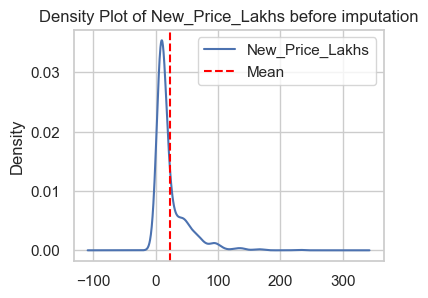

In [122]:
train_data['New_Price_Lakhs'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of New_Price_Lakhs before imputation')
plt.axvline(x=train_data['New_Price_Lakhs'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [123]:
Skewness_of_New_Price_Lakhs_with_missing_values = train_data['New_Price_Lakhs'].skew()

In [124]:
train_data['New_Price_Lakhs'] = train_data.groupby(['Name','Year'], group_keys=False)['New_Price_Lakhs'].apply(lambda x: x.fillna(x.median()))

In [125]:
train_data['New_Price_Lakhs'].isna().sum()

np.int64(5107)

In [126]:
train_data.drop(['New_Price', 'New_Price_Lakhs'], axis = 1, inplace = True)

In [127]:
train_data.head()

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage     Engine  \
0              72000       CNG       Manual      First 26.60000  998.00000   
1              41000    Diesel       Manual      First 19.67000 1582.00000   
2              46000    Petrol       Manual      First 18.20000 1199.00000   
3              87000    Diesel       Manual      First 20.77000 1248.00000   
4              40670    Diesel    Automatic     Second 15.20000 1968.00000   

      Power   Seats    Price  Age_of_car    Brand                       Model  \
0  58.16000 5.00000  1.75000          13   Maruti             Wagon R LXI CNG   
1 126.20000 5.00000 12.50000           8  Hyundai    Creta 1.6 CRDi SX Option   
2  88.70000 5.00000  4.50000          12    Honda                      Jazz V   
3  88.76000 7.00000  6.00000          11   Maruti                  Ertiga VDI   
4 140.80000 5.00000 17.74000          10     Audi  A4 New 2.0 TDI Multitronic   

  Class_of_Brand  
0      Low_class  
1      Low_class  
2      Low_class  
3      Low_class  
4     High_class

In [128]:
train_data.isna().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Age_of_car           0
Brand                0
Model                0
Class_of_Brand       0
dtype: int64

We have successfully treated all the missing values in the data.

# 4.Exploratory data analysis (EDA)

### 4.1.Descriptive Statistics

In [129]:
train_data.describe(include = 'all').T

count unique                     top  freq        mean  \
Unnamed: 0        6019.00000    NaN                     NaN   NaN  3009.00000   
Name                    6019   1876  Mahindra XUV500 W8 2WD    49         NaN   
Location                6019     11                  Mumbai   790         NaN   
Year              6019.00000    NaN                     NaN   NaN  2013.35820   
Kilometers_Driven 6019.00000    NaN                     NaN   NaN 57787.22562   
Fuel_Type               6019      5                  Diesel  3205         NaN   
Transmission            6019      2                  Manual  4299         NaN   
Owner_Type              6019      4                   First  4929         NaN   
Mileage           6019.00000    NaN                     NaN   NaN    18.32171   
Engine            6019.00000    NaN                     NaN   NaN  1620.58407   
Power             6019.00000    NaN                     NaN   NaN   112.85132   
Seats             6019.00000    NaN                     NaN   NaN     5.27762   
Price             6019.00000    NaN                     NaN   NaN     9.47947   
Age_of_car        6019.00000    NaN                     NaN   NaN     9.64180   
Brand                   6019     30                  Maruti  1211         NaN   
Model                   6019   1876           XUV500 W8 2WD    49         NaN   
Class_of_Brand          6019      2               Low_class  4610         NaN   

                          std        min         25%         50%         75%  \
Unnamed: 0         1737.67997    0.00000  1504.50000  3009.00000  4513.50000   
Name                      NaN        NaN         NaN         NaN         NaN   
Location                  NaN        NaN         NaN         NaN         NaN   
Year                  3.26974 1998.00000  2011.00000  2014.00000  2016.00000   
Kilometers_Driven 38987.86904  171.00000 34000.00000 53000.00000 73000.00000   
Fuel_Type                 NaN        NaN         NaN         NaN         NaN   
Transmission              NaN        NaN         NaN         NaN         NaN   
Owner_Type                NaN        NaN         NaN         NaN         NaN   
Mileage               4.16518    6.40000    15.29000    18.20000    21.10000   
Engine              600.44340   72.00000  1198.00000  1493.00000  1984.00000   
Power                53.79292   34.20000    75.00000    93.70000   138.10000   
Seats                 0.80348    2.00000     5.00000     5.00000     5.00000   
Price                11.18792    0.44000     3.50000     5.64000     9.95000   
Age_of_car            3.26974    4.00000     7.00000     9.00000    12.00000   
Brand                     NaN        NaN         NaN         NaN         NaN   
Model                     NaN        NaN         NaN         NaN         NaN   
Class_of_Brand            NaN        NaN         NaN         NaN         NaN   

                           max  
Unnamed: 0          6018.00000  
Name                       NaN  
Location                   NaN  
Year                2019.00000  
Kilometers_Driven 775000.00000  
Fuel_Type                  NaN  
Transmission               NaN  
Owner_Type                 NaN  
Mileage               33.54000  
Engine              5998.00000  
Power                560.00000  
Seats                 10.00000  
Price                160.00000  
Age_of_car            25.00000  
Brand                      NaN  
Model                      NaN  
Class_of_Brand             NaN

### 4.2.Measure of Relatedness - Correlation between target and continuous features

In [130]:
Correlation_variables = ['Price', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Age_of_car']
for feature in Correlation_variables:
    print(feature)
    Correlation_Result = train_data['Price'].corr(train_data[feature])
    print('Correlation between Price and', feature, ':', Correlation_Result)

Price
Correlation between Price and Price : 0.9999999999999999
Kilometers_Driven
Correlation between Price and Kilometers_Driven : -0.1479912903887113
Mileage
Correlation between Price and Mileage : -0.33554480259437464
Engine
Correlation between Price and Engine : 0.6584268503758731
Power
Correlation between Price and Power : 0.773008286203783
Seats
Correlation between Price and Seats : 0.05378742402854663
Age_of_car
Correlation between Price and Age_of_car : -0.3053274083613485


### 4.3.Skewness of Data

In [131]:
Num_variables = ['Price', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Age_of_car']
for feature in Num_variables:
    print(feature, ':', train_data[feature].skew())

Price : 3.3352319876668415
Kilometers_Driven : 4.88150701252247
Mileage : 0.21683110075962878
Engine : 1.4226173541030371
Power : 1.956940592329653
Seats : 1.9107036119186807
Age_of_car : 0.8458021355295817


### 4.4.Kurtosis of Data

In [132]:
Num_variables = ['Price', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Age_of_car']
for feature in Num_variables:
    print(feature, ':', train_data[feature].kurtosis())

Price : 17.09220197043644
Kilometers_Driven : 66.46724235436773
Mileage : -0.26944220577922007
Engine : 3.12011134441167
Power : 6.763057693160825
Seats : 4.383215060515923
Age_of_car : 0.8942008849831131


### 4.5.Data Visualization

 Histograms of continuous features

In [133]:
def histograms_plot(Data, features, rows, cols):
    fig=plt.figure(figsize=(15,8))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        train_data[feature].hist(density = True, ax=ax, color = 'pink', edgecolor = 'black' )
        ax.set_title(feature)
        plt.axvline(x=train_data[feature].mean(), color='red', linestyle='--', label='Mean')
        plt.axvline(x=train_data[feature].median(), color='green', linestyle='--', label='Median')
        plt.legend()
fig.tight_layout()
plt.show()

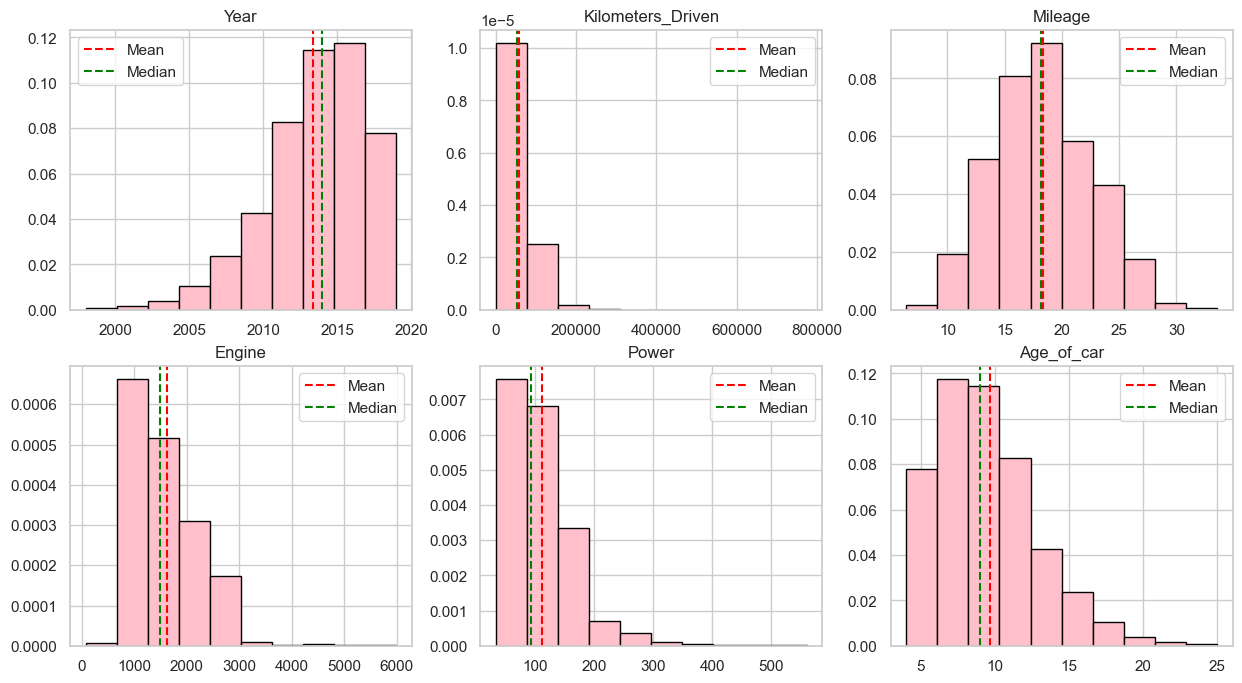

In [134]:
Continuous_features = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Age_of_car']
histograms_plot(train_data, Continuous_features, 2,3)

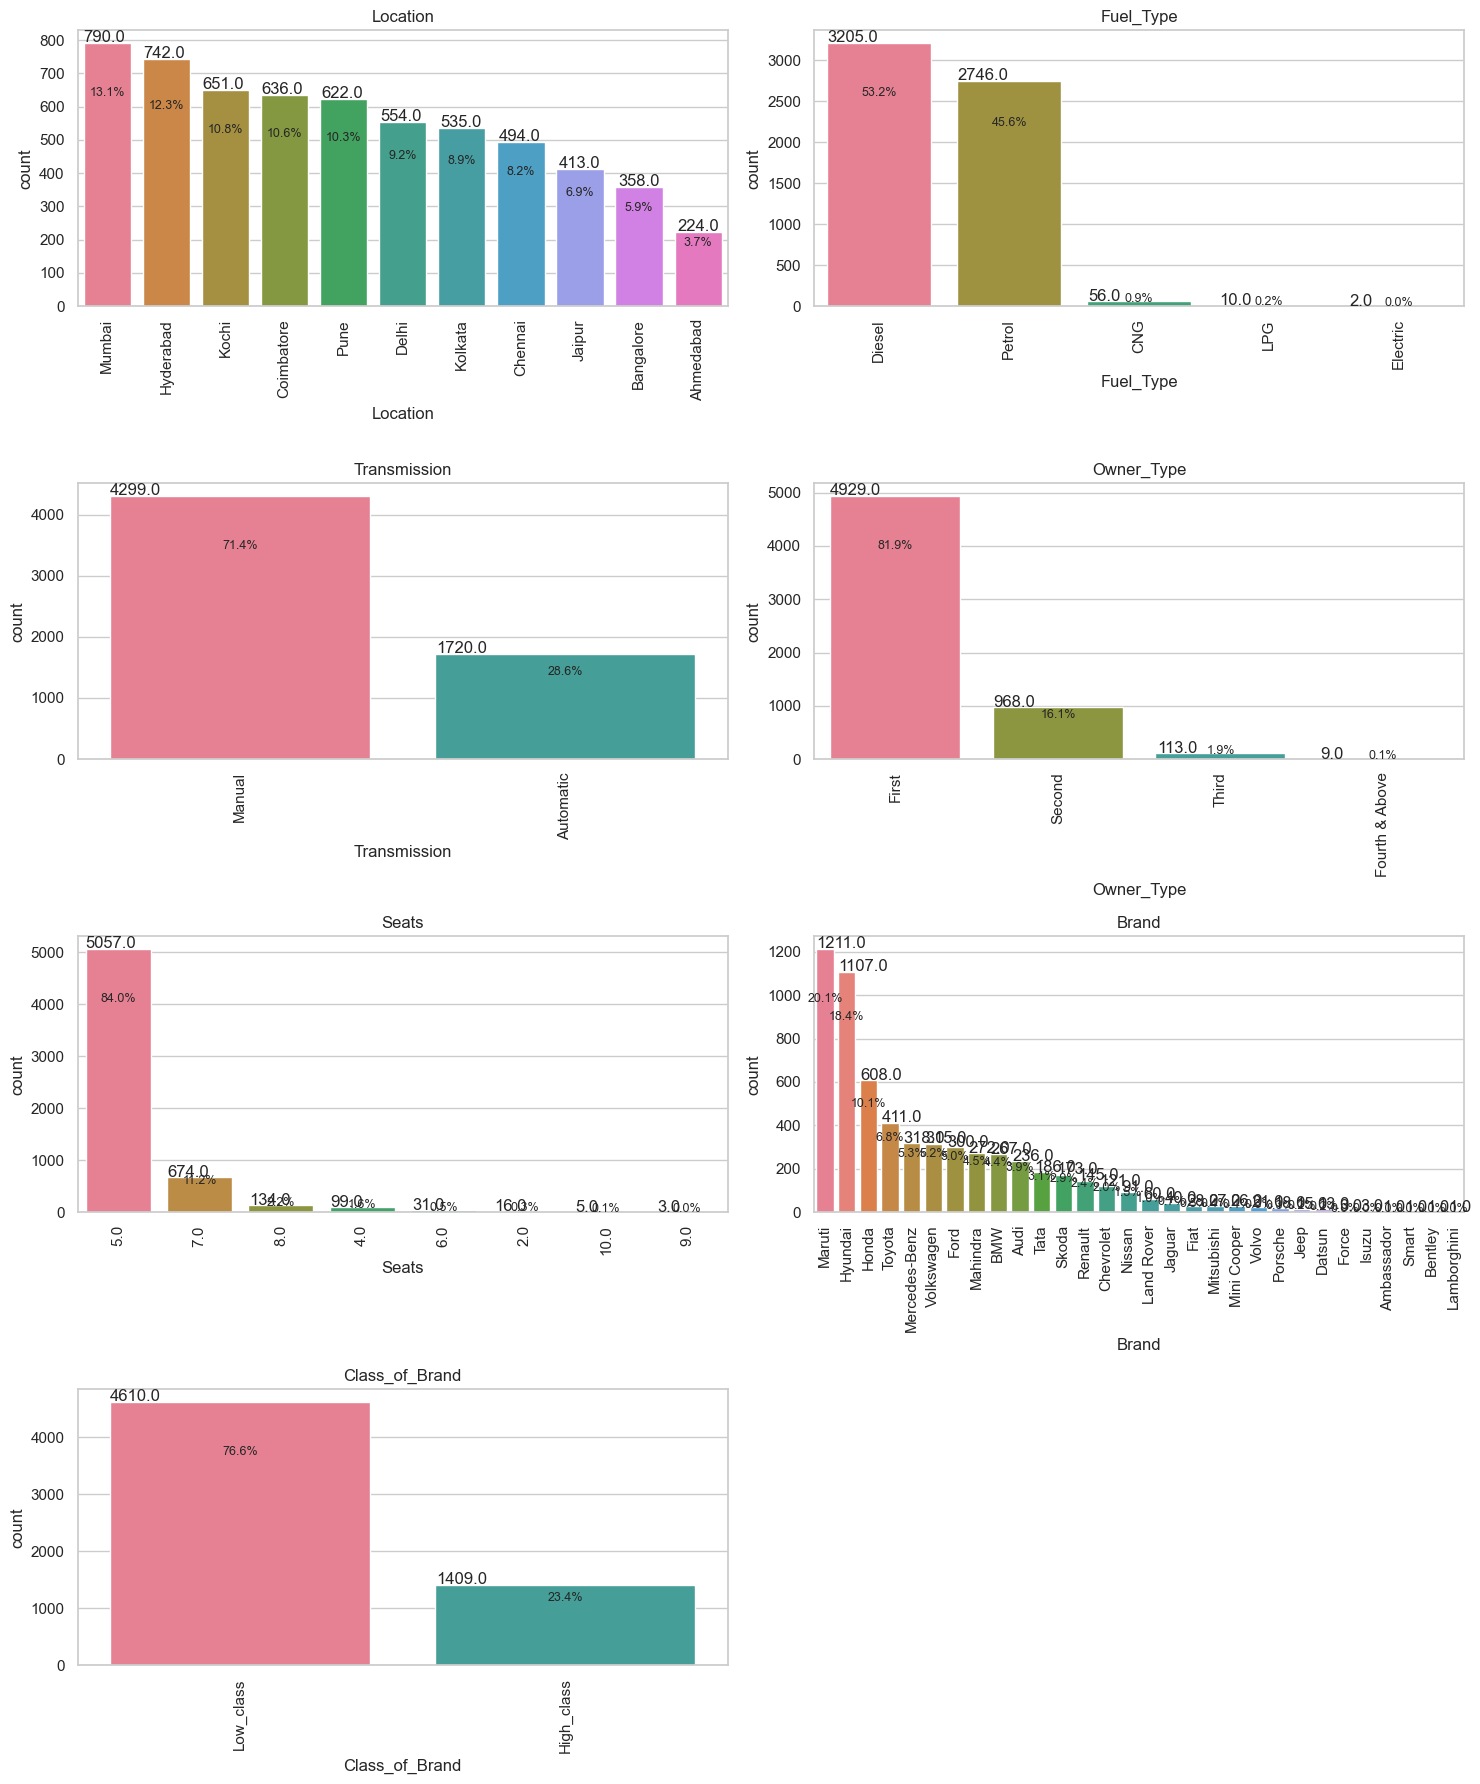

In [135]:
# List of categorical features to plot
Categorical_features = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats', 'Brand', 'Class_of_Brand']

# Layout for subplots
a = 4  # rows
b = 2  # columns
c = 1  # plot index

fig = plt.figure(figsize=(15, 18))
sns.set_theme(style="whitegrid")  # Optional: clean white background

for i in Categorical_features:
    plt.subplot(a, b, c)
    plt.title(f'{i}')
    plt.xlabel(i)
    plt.xticks(rotation=90)

    # Add colorful palette here
    ax = sns.countplot(data=train_data, x=i, order=train_data[i].value_counts().index, palette='husl')

    # Annotate bar counts and percentages
    for p in ax.patches:
        x = p.get_x() * 1.005
        y = p.get_height() * 1.005
        ax.annotate(str(p.get_height()), (x, y))

        percentage = "{:.1f}%".format(100 * p.get_height() / len(train_data))  # dynamic total
        x1 = p.get_x() + p.get_width() / 2
        y1 = p.get_y() + p.get_height() * 0.8
        ax.annotate(percentage, (x1, y1), ha="center", fontsize=9)

    c += 1

plt.tight_layout()
plt.show()

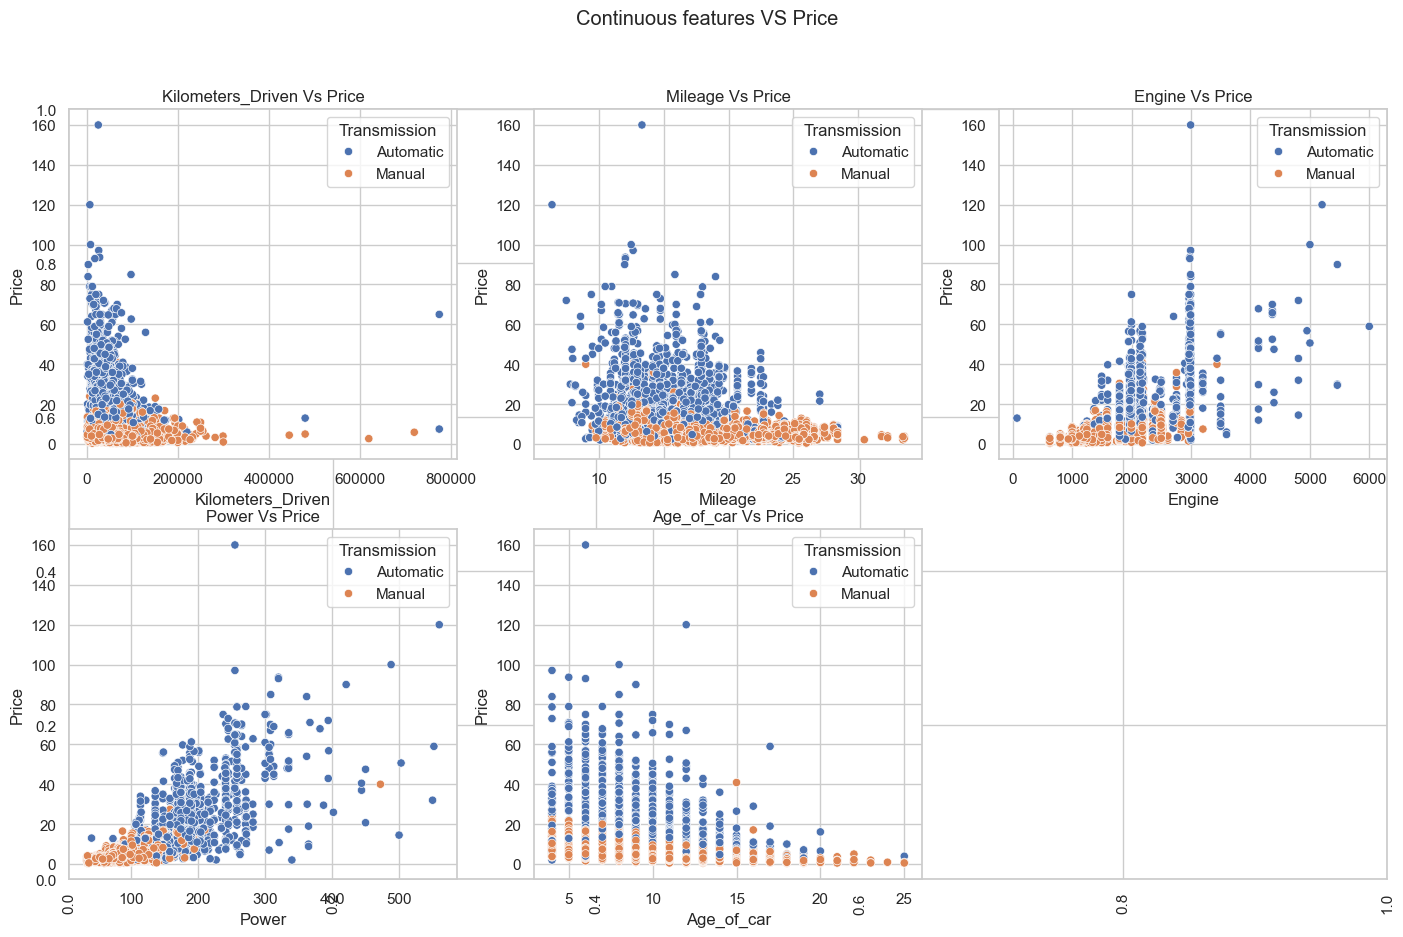

In [136]:
Continuous_features = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Age_of_car']
fig = plt.figure(figsize=(17, 10))
plt.xticks(rotation=90)
for feature, i in zip (Continuous_features, range(6)):
    ax = plt.subplot(2, 3, i + 1)
    plot = sns.scatterplot(data = train_data, x = feature, y = 'Price', ax=ax, hue = train_data['Transmission'])
    plot.set_title(feature + ' Vs ' + 'Price')
    plot.set_xlabel(feature)
    plot.set_ylabel('Price')
    fig.suptitle("Continuous features VS Price")

Understanding Price relationship with Categorical variables

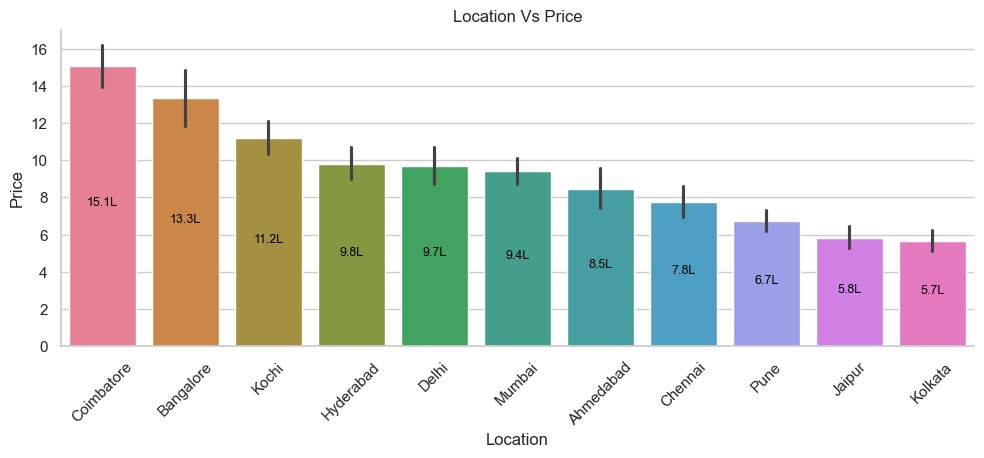

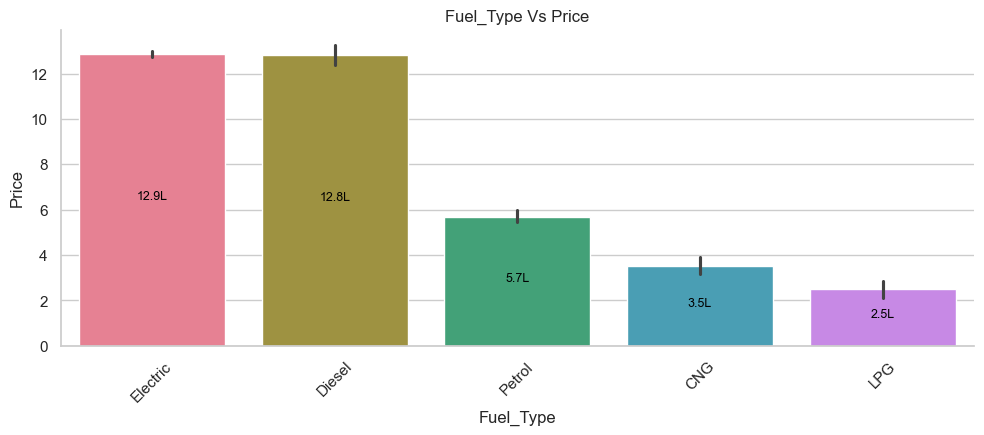

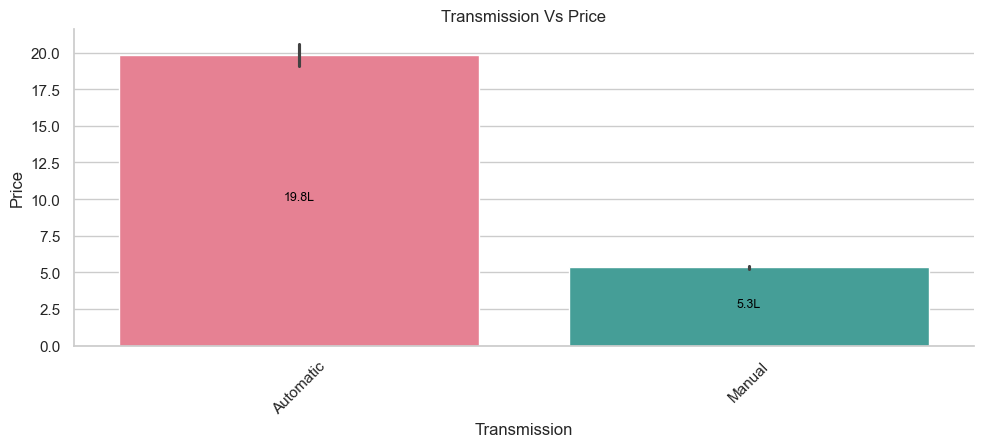

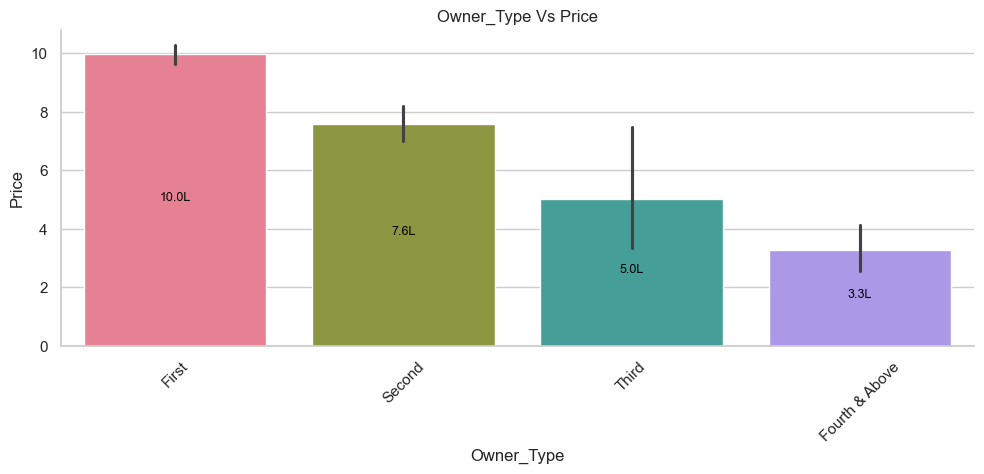

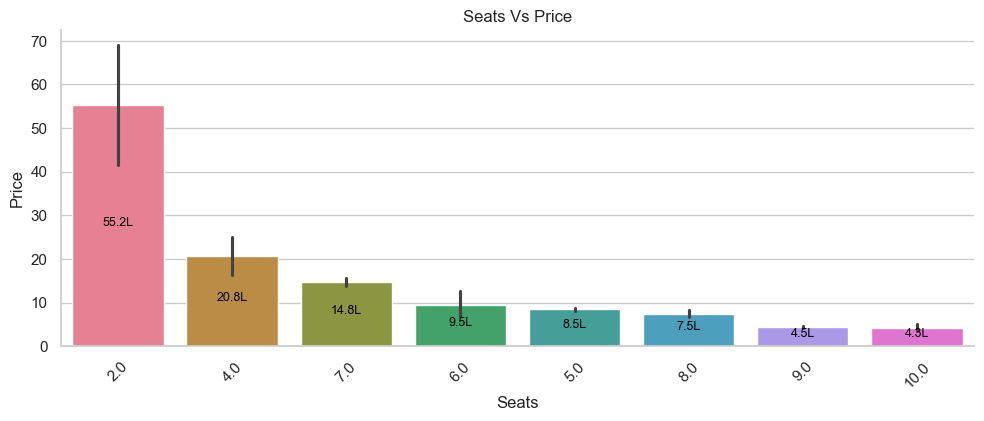

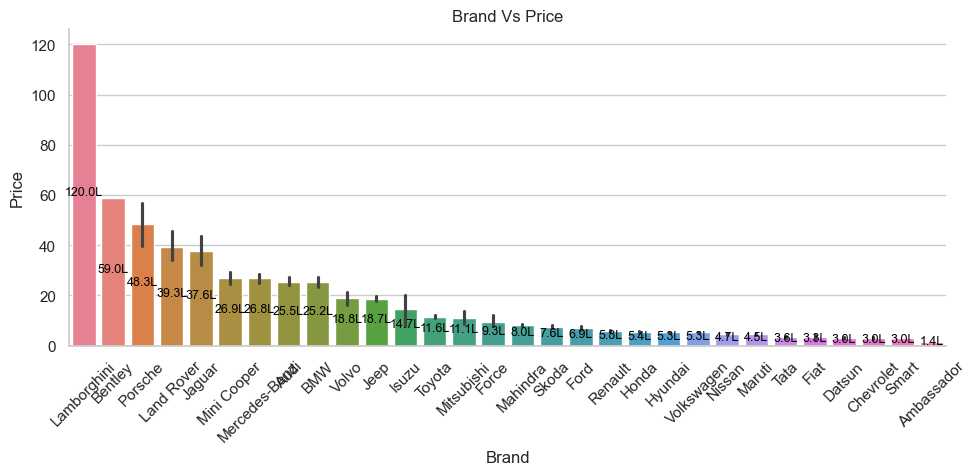

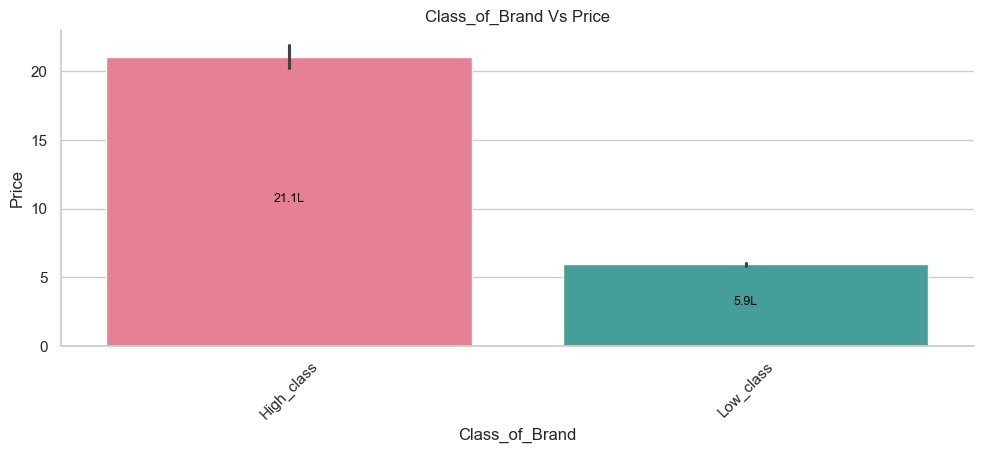

In [137]:
Categorical_features = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats', 'Brand', 'Class_of_Brand']

sns.set_theme(style="whitegrid")

for feature in Categorical_features:
    # Sort categories by mean price
    order = train_data.groupby([feature])['Price'].mean().sort_values(ascending=False).index
    
    # Create a colorful bar plot using catplot
    plot = sns.catplot(
        x=feature, y="Price", data=train_data,
        kind='bar', order=order, height=4, aspect=2.5,
        palette='husl'
    )
    
    # Set title
    plot.set(title=f'{feature} Vs Price')

    # Rotate x-axis labels for clarity
    plt.xticks(rotation=45)

    # Annotate bars with prices
    ax = plot.facet_axis(0, 0)
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            x=(p.get_x() + p.get_width() / 2),
            y=(height * 0.5),
            s='{0:.1f}L'.format(height),
            ha='center',
            fontsize=9,
            color='black'
        )

plt.show()


Bar Graph Count of cars based on manufacturers

### 4.6.Multivariate plots

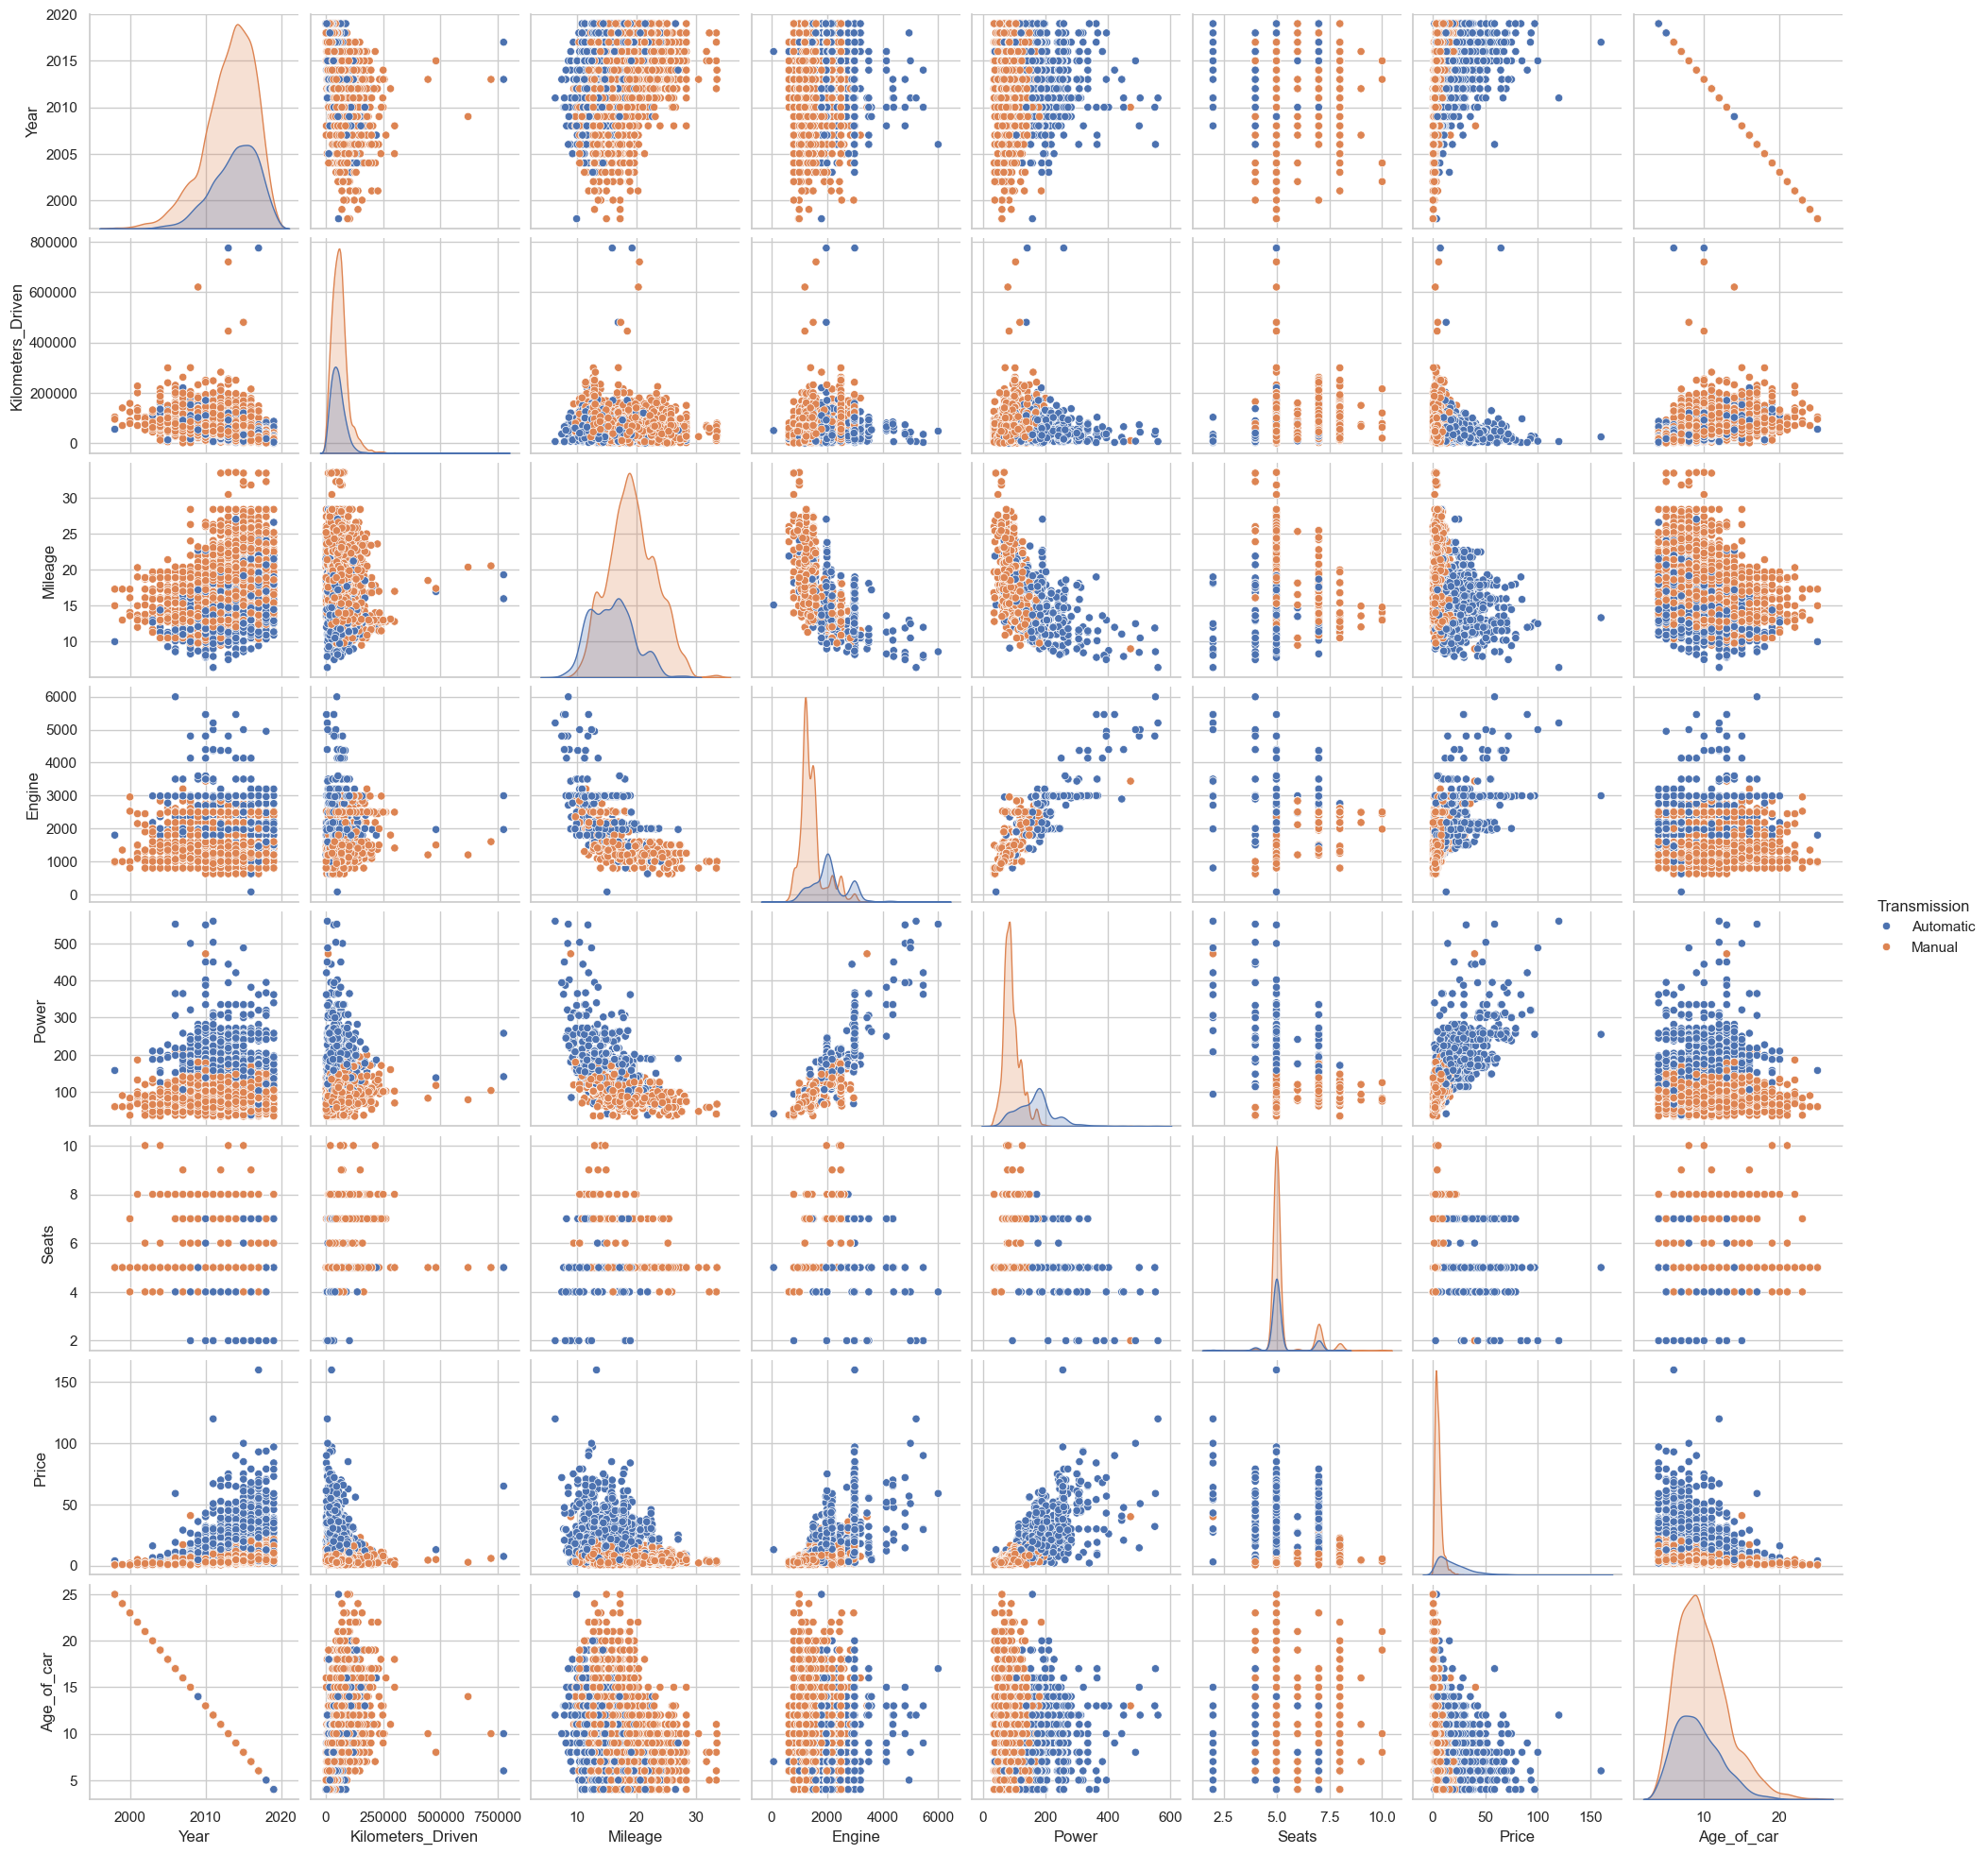

<Figure size 1400x1400 with 0 Axes>

In [138]:
cols_Pairplot = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'Age_of_car', 'Transmission'] 
sns.pairplot(train_data[cols_Pairplot], hue = 'Transmission')
plt.figure(figsize = (14, 14))
plt.show()

Text(0.5, 1.0, 'Heatmap')

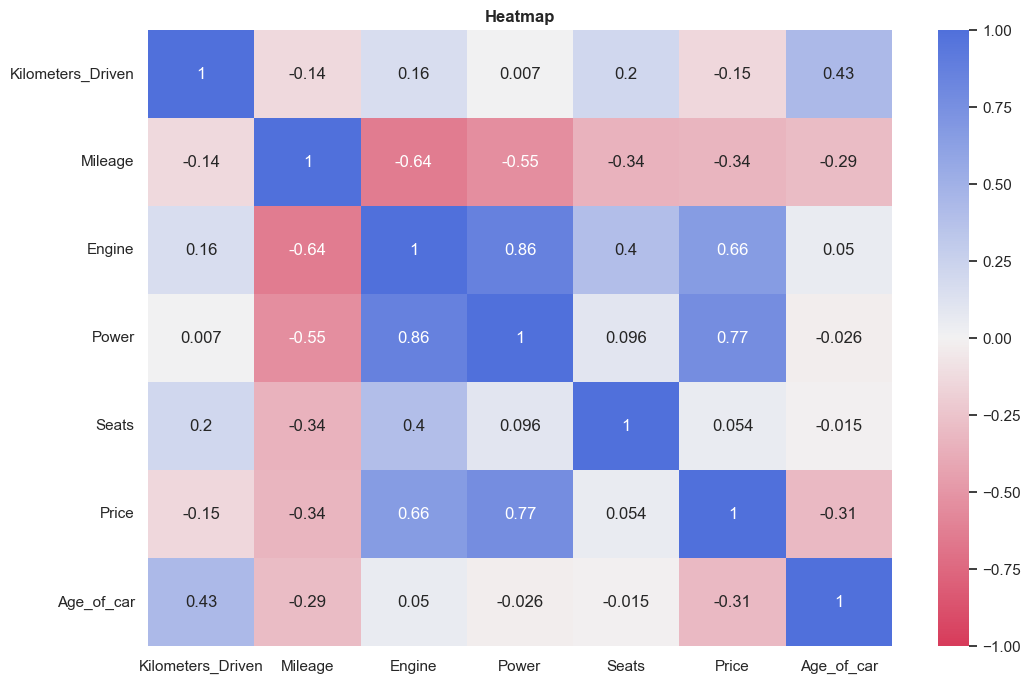

In [139]:
cols_Heatmap = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'Age_of_car'] 
plt.figure(figsize = (12,8))
#create palette to show positive values in blue and negative values in red
cmap=sns.diverging_palette(5, 260, as_cmap=True)
#plot heatmap
sns.heatmap(train_data[cols_Heatmap].corr(), annot=True, cmap=cmap, vmin=-1, vmax=1)
plt.title('Heatmap', fontweight='bold')

In [140]:
make_train = train_data['Name'].str.split(' ',expand = True)
make_test = train_data['Name'].str.split(' ',expand = True)
train_data['Manufacturer'] = make_train[0]
train_data["Manufacturer"] = make_test[0]

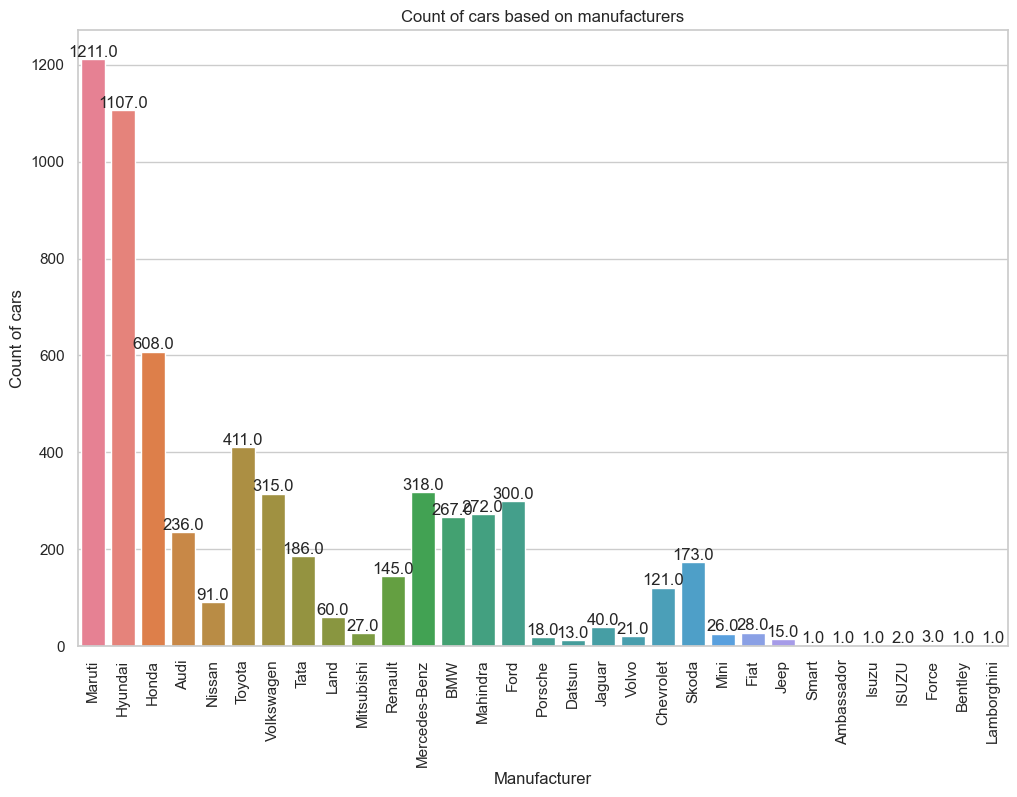

In [141]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))

# Apply palette here inside countplot
plot = sns.countplot(x='Manufacturer', data=train_data, palette='husl')

plt.xticks(rotation=90)

for p in plot.patches:
    plot.annotate(p.get_height(),
                  (p.get_x() + p.get_width() / 2.0, p.get_height()),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

plt.show()

 Plot the Price distribution according to the sales location of the car

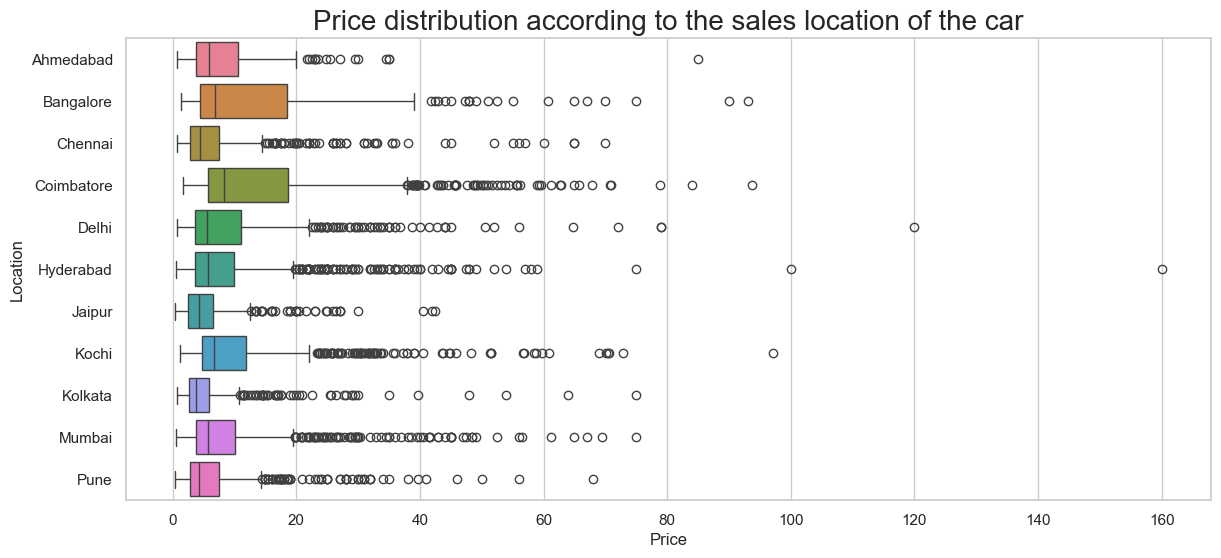

In [142]:
sns.set_theme(style="whitegrid")  # whitegrid style

plt.figure(figsize=(14, 6))
sns.boxplot(x='Price', y='Location', data=train_data, palette='husl')  # colorful palette

plt.title("Price distribution according to the sales location of the car", fontsize=20, ha='center')
plt.show()

In [143]:
cat_cols = train_data.select_dtypes(include='object').columns.tolist()
cat_cols

['Name', 'Brand', 'Model', 'Manufacturer']

In [144]:
for col in cat_cols:
    print(train_data[col].value_counts())
    print('------------------------------------------------------------')

Name
Mahindra XUV500 W8 2WD                        49
Maruti Swift VDI                              45
Honda City 1.5 S MT                           34
Maruti Swift Dzire VDI                        34
Maruti Swift VDI BSIV                         31
                                              ..
Hyundai i20 2015-2017 Magna                    1
Tata Indica LEI                                1
Mercedes-Benz GLA Class 200 Sport              1
Skoda Rapid Ultima 1.6 TDI Elegance            1
Mercedes-Benz New C-Class C 200 AVANTGARDE     1
Name: count, Length: 1876, dtype: int64
------------------------------------------------------------
Brand
Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land Rover         

Pie Chart of Location,Fuel_Type,Transmission and Owner Type

In [145]:
def colpie (col ):
    fig = px.pie(data_frame = train_data , names = col)
    fig.show()
colpie('Location')
colpie('Fuel_Type')
colpie('Transmission')
colpie('Owner_Type')

In [146]:
loc_price = train_data.groupby('Location')['Price'].mean().sort_values(ascending=False)
fig = px.bar(loc_price , color = loc_price.index )
fig.show()

Cars in Coimbatore are higher priced than cars in other regions.
Cars in Hyderabad , Delhi are the similar in price.
Cars in Pune , Chennai are the same price

In [147]:
fuel_price = train_data.groupby('Fuel_Type')['Price'].mean().sort_values(ascending=False)
fig = px.bar(fuel_price , color = fuel_price.index )
fig.show()

The cars that use fuel-type diesel have higher prices.

Text(0.5, 1.0, 'Prices of the cars as per the year of sales')

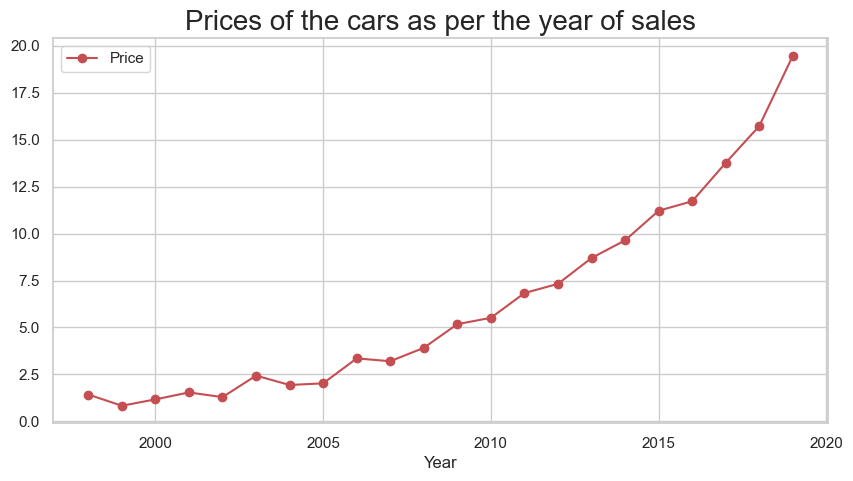

In [148]:
axis = train_data.groupby('Year')[['Price']].mean().plot(figsize=(10,5),marker='o',color='r')
plt.title("Prices of the cars as per the year of sales", fontsize=20,ha='center')

In [149]:
import plotly.express as px

#### Kilometer Cover Yearly

Text(0.5, 1.0, 'Kilometers driven over the course of years')

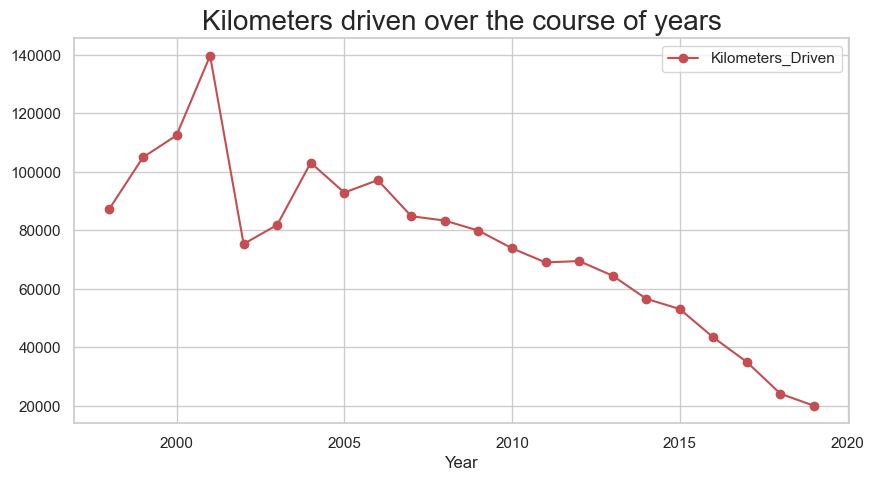

In [150]:
axis = train_data.groupby('Year')[['Kilometers_Driven']].mean().plot(figsize=(10,5),marker='o',color='r')
plt.title("Kilometers driven over the course of years", fontsize=20,ha='center')

In [151]:
fig = px.scatter(train_data,x='Price', y='Kilometers_Driven')
fig.update_layout(title='Price v/s Kilometers_driven',xaxis_title="Kilometers Driven",yaxis_title="Price")
fig.show()

AS we can see Kilometer decrease prices are increasing

In [153]:
fig = px.scatter(train_data , x = np.log(train_data['Kilometers_Driven']),y= np.log(train_data['Price']) ,trendline='ols')
fig.show()

In [154]:
fig = px.scatter(train_data, x =(train_data['Mileage']),y= (train_data['Price']), trendline='ols')
fig.show()

In [155]:
seet_price = train_data.groupby('Seats')['Price'].mean()
fig = px.bar(seet_price , color = seet_price.index )
fig.show()

As we can see 2nd sit has more prices

Text(0.5, 1.0, 'Distributional of price')

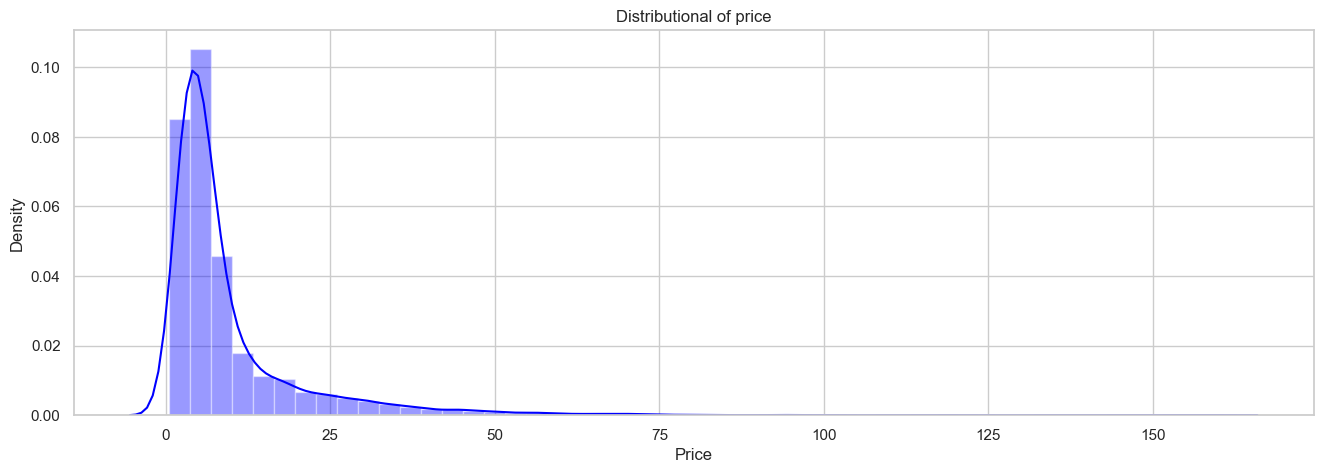

In [157]:
f, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(train_data["Price"], color="blue",ax = axes)
plt.title("Distributional of price")

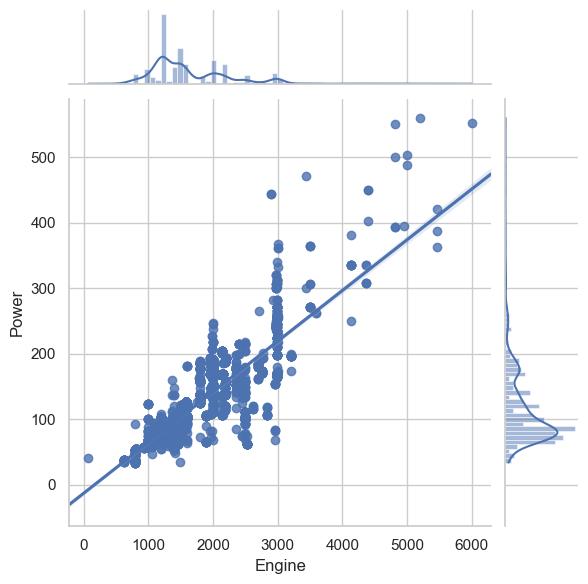

In [158]:
sns.jointplot(y = 'Power',x = 'Engine',data = train_data,kind="reg", truncate=False)

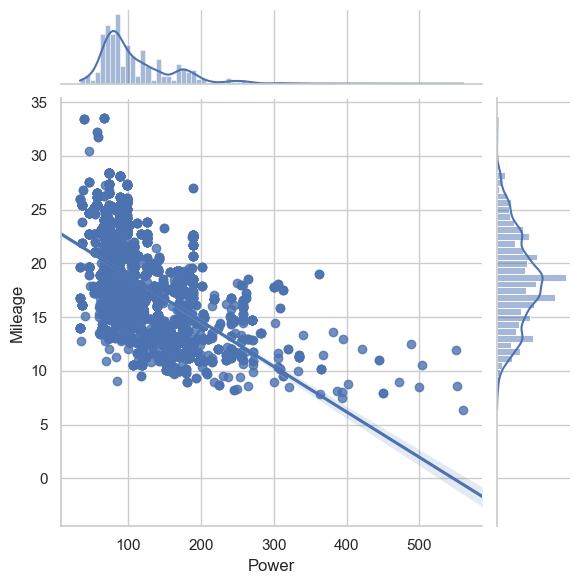

In [159]:
sns.jointplot(x = 'Power',y = 'Mileage',data = train_data,kind="reg", truncate=False)

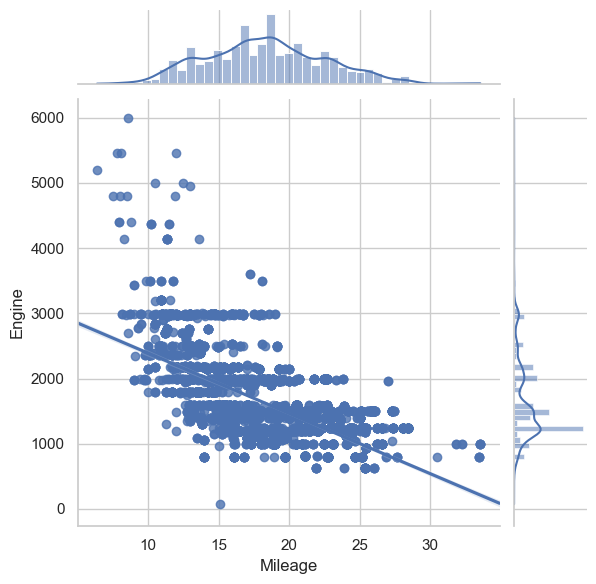

In [160]:
sns.jointplot(y = 'Engine',x = 'Mileage',data = train_data,kind="reg", truncate=False)

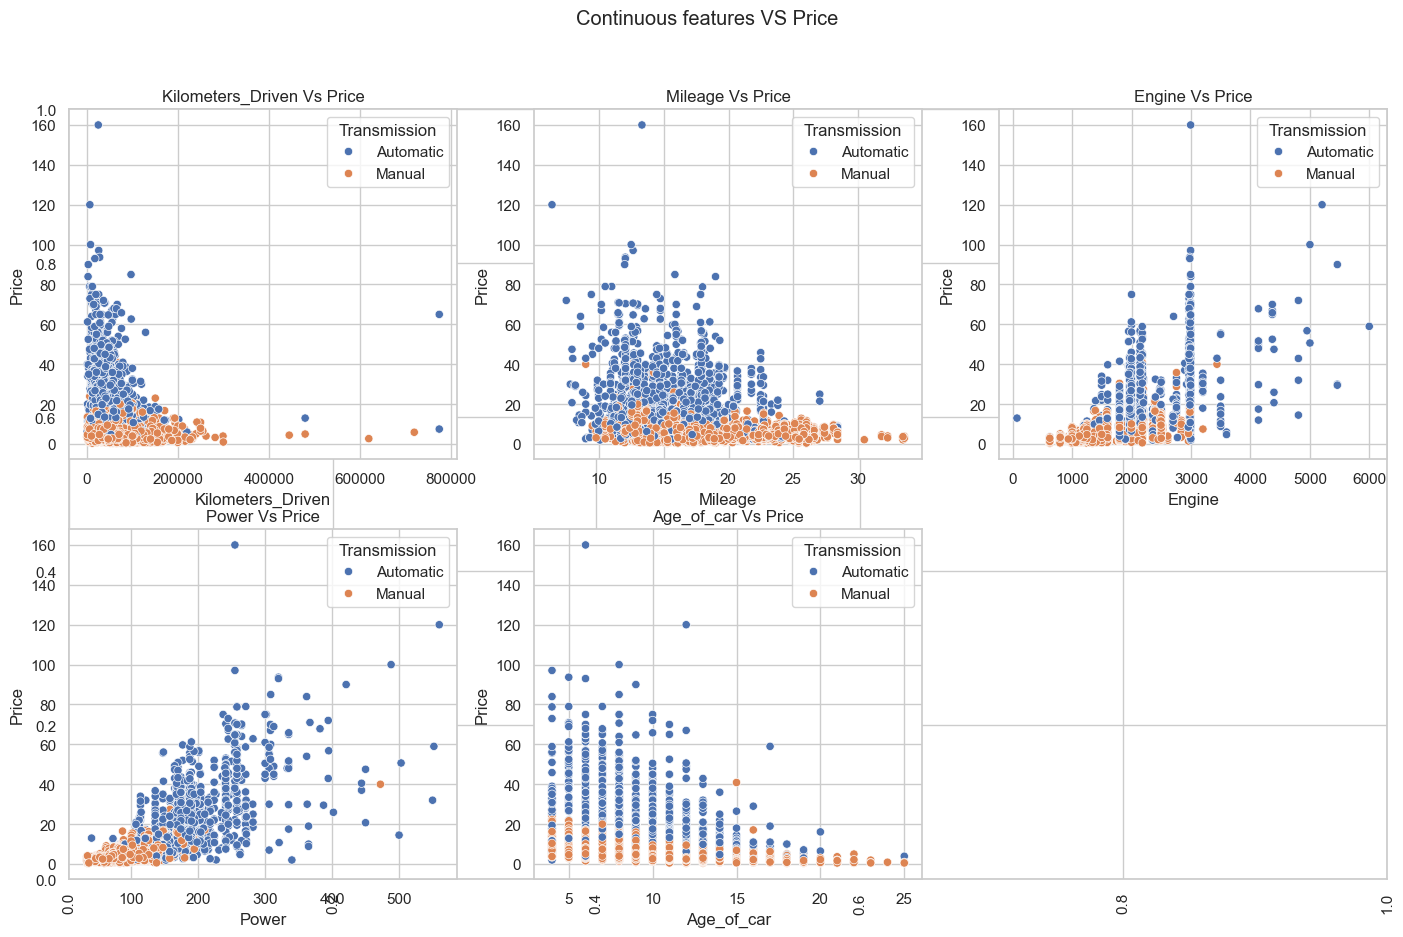

In [161]:
Continuous_features = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Age_of_car']
fig = plt.figure(figsize=(17, 10))
plt.xticks(rotation=90)
for feature, i in zip (Continuous_features, range(6)):
    ax = plt.subplot(2, 3, i + 1)
    plot = sns.scatterplot(data = train_data, x = feature, y = 'Price', ax=ax, hue = train_data['Transmission'])
    plot.set_title(feature + ' Vs ' + 'Price')
    plot.set_xlabel(feature)
    plot.set_ylabel('Price')
    fig.suptitle("Continuous features VS Price")

# 5.Features Selection

### 5.1.Deleting the features which are logically useless.

In [162]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Unnamed: 0         6019 non-null   int64   
 1   Name               6019 non-null   object  
 2   Location           6019 non-null   category
 3   Year               6019 non-null   int64   
 4   Kilometers_Driven  6019 non-null   int64   
 5   Fuel_Type          6019 non-null   category
 6   Transmission       6019 non-null   category
 7   Owner_Type         6019 non-null   category
 8   Mileage            6019 non-null   float64 
 9   Engine             6019 non-null   float64 
 10  Power              6019 non-null   float64 
 11  Seats              6019 non-null   float64 
 12  Price              6019 non-null   float64 
 13  Age_of_car         6019 non-null   int64   
 14  Brand              6019 non-null   object  
 15  Model              6019 non-null   object  
 16  Class_

We will drop 'Unnamed: 0' column. Also we need to drop 'Year' column as we are keeping 'Age of car' column. We will also drop 'Name' and 'Model' as these are object variables and we have already derived a new variable i.e. 'Class_of_Brand' from them.

In [163]:
train_data.drop(['Unnamed: 0', 'Name', 'Year', 'Model'], axis = 1, inplace = True)
train_data.head()

Location  Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  \
0      Mumbai              72000       CNG       Manual      First 26.60000   
1        Pune              41000    Diesel       Manual      First 19.67000   
2     Chennai              46000    Petrol       Manual      First 18.20000   
3     Chennai              87000    Diesel       Manual      First 20.77000   
4  Coimbatore              40670    Diesel    Automatic     Second 15.20000   

      Engine     Power   Seats    Price  Age_of_car    Brand Class_of_Brand  \
0  998.00000  58.16000 5.00000  1.75000          13   Maruti      Low_class   
1 1582.00000 126.20000 5.00000 12.50000           8  Hyundai      Low_class   
2 1199.00000  88.70000 5.00000  4.50000          12    Honda      Low_class   
3 1248.00000  88.76000 7.00000  6.00000          11   Maruti      Low_class   
4 1968.00000 140.80000 5.00000 17.74000          10     Audi     High_class   

  Manufacturer  
0       Maruti  
1      Hyundai  
2        Honda  
3       Maruti  
4         Audi

### 5.2.Exploration of relationship between Continuous feature vs Continuous target

#### 5.2.1.Visual exploration of relationship between Continuous feature vs Continuous target --- Scatter plot

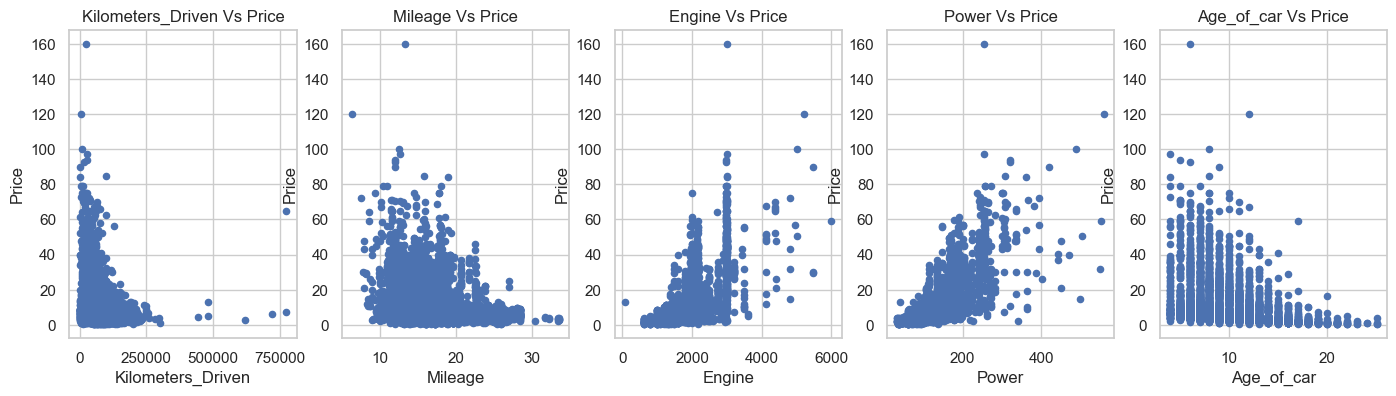

In [164]:
Continuous_features = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Age_of_car']
fig, axes = plt.subplots(nrows = 1, ncols = len(Continuous_features), figsize = (17,4))
for feature, i in zip (Continuous_features, range(len(Continuous_features))):
    train_data.plot.scatter(x = feature, y = 'Price', title = feature + ' Vs ' + 'Price', ax = axes[i])

In [165]:
Correlation_variables = ['Price','Kilometers_Driven', 'Mileage', 'Engine', 'Power','Age_of_car']
Correlation = train_data[Correlation_variables].corr()
print(Correlation)

Continuous_features = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Age_of_car']

# Creating an empty list of selected features after ANOVA test
Selected_features_Pearson_Correlation = []
    
# printing correlation between target and features only.
print('-------------------------------------------------------------')
print ('\n------ Pearson correlation coefficient Results ------ \n')
for feature in Continuous_features:
    print(feature)
    Correlation_Result = train_data['Price'].corr(train_data[feature])
    print('Pearsons correlation between Price and', feature, ':', Correlation_Result)  
    print('Pearsons correlation absolute value between Price and', feature, ':', abs(Correlation_Result))
    
    # If the Correlation value is > 0.3, we will reject null i.e. H0  
    if (abs(Correlation_Result) > 0.3):
        print('As correlation between Price and', feature, 'is greater than 0.3', feature, 'is correlated with Price')
        Selected_features_Pearson_Correlation.append(feature)
    else:
        print('As correlation between Price and', feature, 'is less than 0.3', feature, 'is NOT correlated with Price')
    print('-----------------------------------------------------------------------')

print ('\nSelected features are :', Selected_features_Pearson_Correlation)

                     Price  Kilometers_Driven  Mileage   Engine    Power  \
Price              1.00000           -0.14799 -0.33554  0.65843  0.77301   
Kilometers_Driven -0.14799            1.00000 -0.13792  0.15668  0.00699   
Mileage           -0.33554           -0.13792  1.00000 -0.64229 -0.54610   
Engine             0.65843            0.15668 -0.64229  1.00000  0.86331   
Power              0.77301            0.00699 -0.54610  0.86331  1.00000   
Age_of_car        -0.30533            0.43227 -0.29272  0.05016 -0.02634   

                   Age_of_car  
Price                -0.30533  
Kilometers_Driven     0.43227  
Mileage              -0.29272  
Engine                0.05016  
Power                -0.02634  
Age_of_car            1.00000  
-------------------------------------------------------------

------ Pearson correlation coefficient Results ------ 

Kilometers_Driven
Pearsons correlation between Price and Kilometers_Driven : -0.1479912903887113
Pearsons correlation absolu

The scatter plots give an idea about how the two variables are correlated.

### 5.2.2.Visual exploration of relationship between Categorical feature vs Continuous target --- Box plot

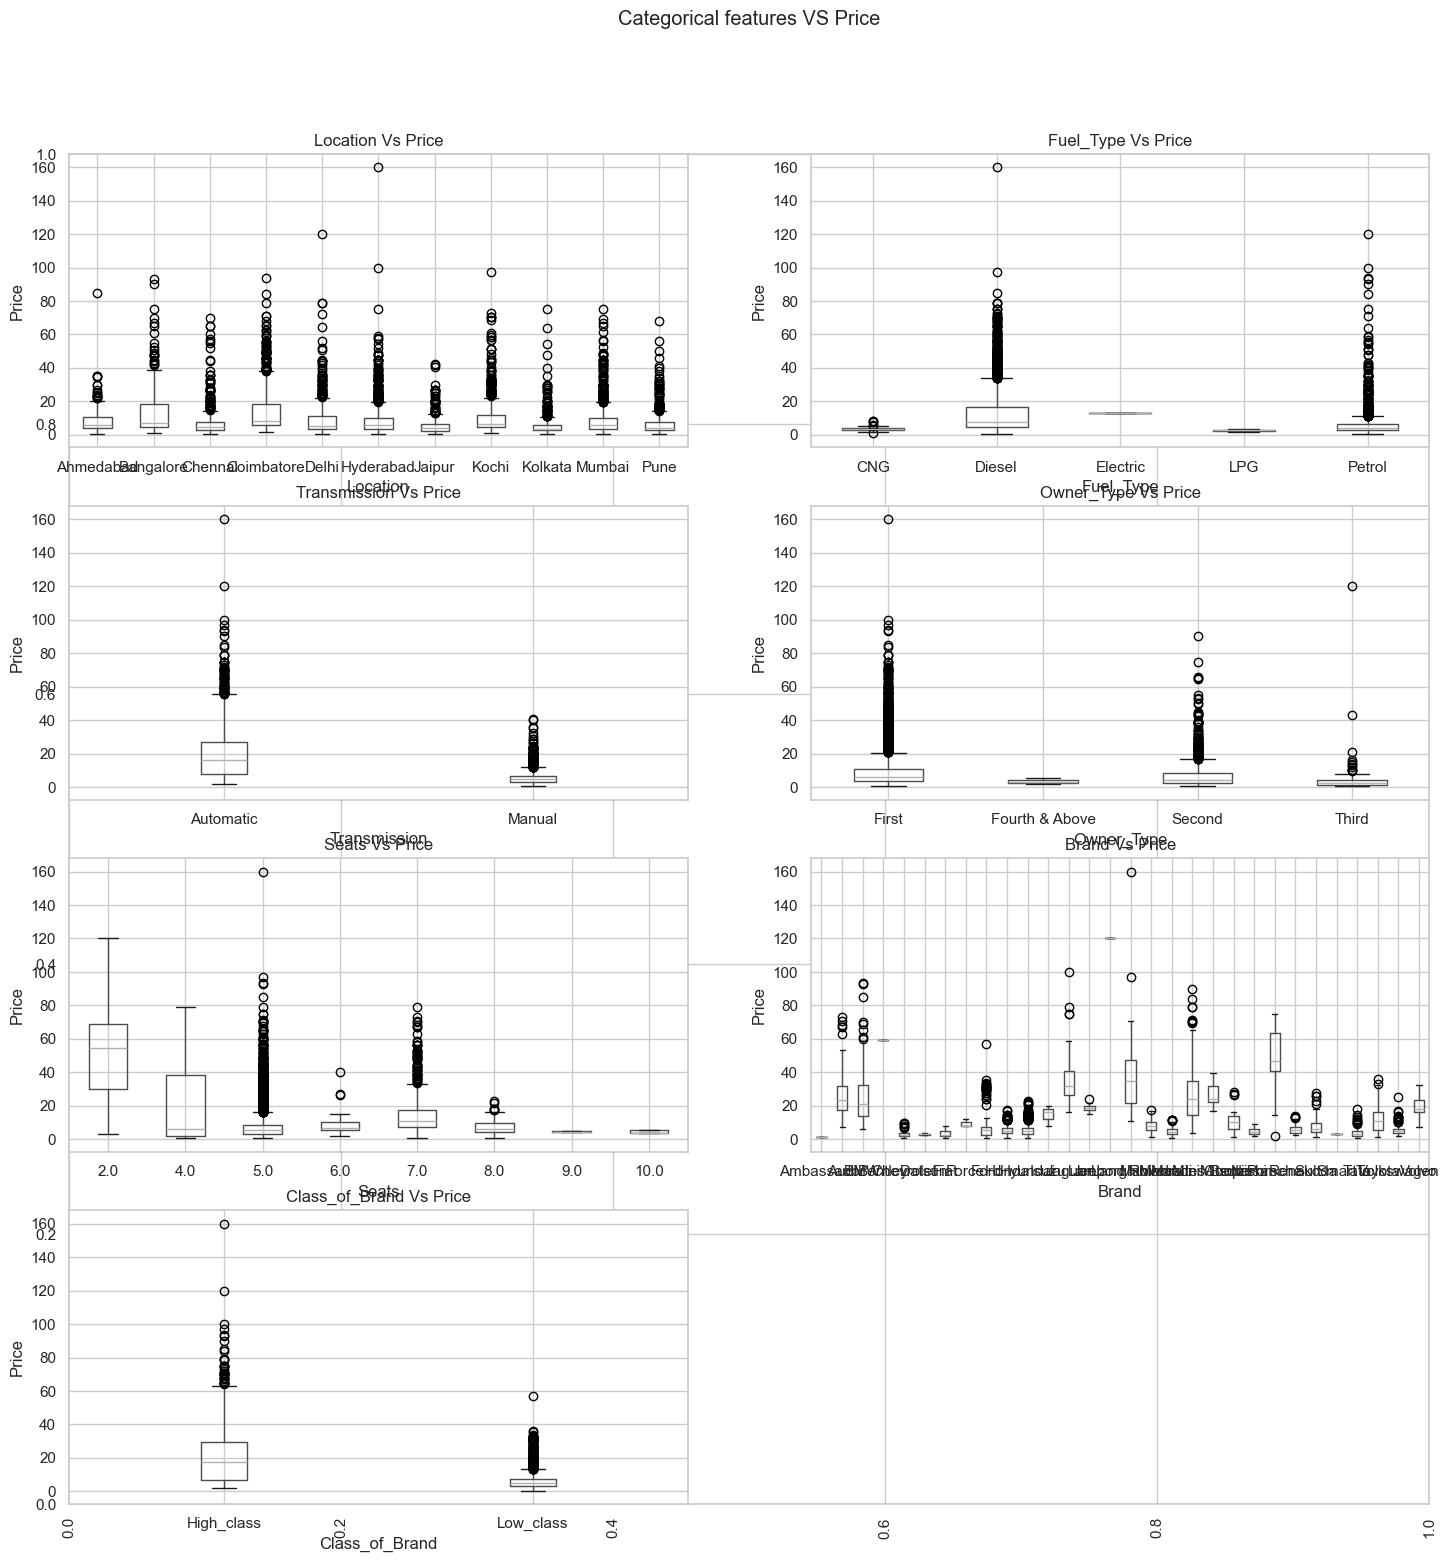

In [166]:
Categorical_features = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats', 'Brand', 'Class_of_Brand' ]
fig = plt.figure(figsize=(17, 18))
plt.xticks(rotation=90)
for feature, i in zip (Categorical_features, range(7)):
    ax = plt.subplot(4, 2, i + 1)
    plot = train_data.boxplot(column = 'Price', by = feature, ax=ax)
    plot.set_title(feature + ' Vs ' + 'Price')
    plot.set_xlabel(feature)
    plot.set_ylabel('Price')
    fig.suptitle("Categorical features VS Price")


Statistical measurement of relationship between Categorical feature vs Continuous target --- ANOVA test

In [167]:
def ANOVA (Data, Categorical_features, Target):
    from scipy.stats import f_oneway

    # Creating an empty list of selected features after ANOVA test
    global Selected_features_ANOVA
    Selected_features_ANOVA = []

    # For ANOVA test, we need Categorywise_feature_list.
    # e.g. in case of Age, we need a list of age of people who did not survive and a list of age of people who survied.

    print ('------ ANOVA Results ------ \n')
    for feature in Categorical_features:
        Categorywise_feature_list = Data.groupby (feature)[Target].apply(list)
        ANOVA_Results = f_oneway (*Categorywise_feature_list)

        # If the p-value of ANOVA test is < 0.05, we will reject null ie.e H0

        if  (ANOVA_Results[1] < 0.05) :
            print ('As p-value', ANOVA_Results[1], 'is less than 0.05,    ', feature, 'is correlated with', Target)
            Selected_features_ANOVA.append(feature)
        else:
            print ('As p-value', ANOVA_Results[1], 'is greater than 0.05,    ', feature, 'is NOT correlated with', Target)
    print ('--------------------------------------------------')
    print ('\nSelected features are :', Selected_features_ANOVA)

In [168]:
ANOVA(Data = train_data, Categorical_features = Categorical_features, Target = 'Price')

------ ANOVA Results ------ 

As p-value 4.657735638119322e-77 is less than 0.05,     Location is correlated with Price
As p-value 8.146026879615981e-141 is less than 0.05,     Fuel_Type is correlated with Price
As p-value 0.0 is less than 0.05,     Transmission is correlated with Price
As p-value 1.9349311196976507e-12 is less than 0.05,     Owner_Type is correlated with Price
As p-value 4.443290167031985e-125 is less than 0.05,     Seats is correlated with Price
As p-value 0.0 is less than 0.05,     Brand is correlated with Price
As p-value 0.0 is less than 0.05,     Class_of_Brand is correlated with Price
--------------------------------------------------

Selected features are : ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats', 'Brand', 'Class_of_Brand']


Selecting final columns for Machine Learning

In [169]:
Selected_features = Selected_features_Pearson_Correlation + Selected_features_ANOVA
Selected_features

['Mileage',
 'Engine',
 'Power',
 'Age_of_car',
 'Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Seats',
 'Brand',
 'Class_of_Brand']

In [170]:
Selected_columns = ['Kilometers_Driven'] + Selected_features + ['Price']
Final_data_for_ML1 = train_data[Selected_columns]

In [171]:
Final_data_for_ML1.head()

Kilometers_Driven  Mileage     Engine     Power  Age_of_car    Location  \
0              72000 26.60000  998.00000  58.16000          13      Mumbai   
1              41000 19.67000 1582.00000 126.20000           8        Pune   
2              46000 18.20000 1199.00000  88.70000          12     Chennai   
3              87000 20.77000 1248.00000  88.76000          11     Chennai   
4              40670 15.20000 1968.00000 140.80000          10  Coimbatore   

  Fuel_Type Transmission Owner_Type   Seats    Brand Class_of_Brand    Price  
0       CNG       Manual      First 5.00000   Maruti      Low_class  1.75000  
1    Diesel       Manual      First 5.00000  Hyundai      Low_class 12.50000  
2    Petrol       Manual      First 5.00000    Honda      Low_class  4.50000  
3    Diesel       Manual      First 7.00000   Maruti      Low_class  6.00000  
4    Diesel    Automatic     Second 5.00000     Audi     High_class 17.74000

### 5.3.Data Tranforms-Encoding

In [172]:
Final_data_for_ML1 = pd.get_dummies(Final_data_for_ML1,
                                   columns=['Location', 'Fuel_Type','Transmission','Owner_Type','Brand', 'Class_of_Brand'],
                                    drop_first=True)
Final_data_for_ML1.head()

Kilometers_Driven  Mileage     Engine     Power  Age_of_car   Seats  \
0              72000 26.60000  998.00000  58.16000          13 5.00000   
1              41000 19.67000 1582.00000 126.20000           8 5.00000   
2              46000 18.20000 1199.00000  88.70000          12 5.00000   
3              87000 20.77000 1248.00000  88.76000          11 7.00000   
4              40670 15.20000 1968.00000 140.80000          10 5.00000   

     Price  Location_Bangalore  Location_Chennai  Location_Coimbatore  ...  \
0  1.75000               False             False                False  ...   
1 12.50000               False             False                False  ...   
2  4.50000               False              True                False  ...   
3  6.00000               False              True                False  ...   
4 17.74000               False             False                 True  ...   

   Brand_Nissan  Brand_Porsche  Brand_Renault  Brand_Skoda  Brand_Smart  \
0         False          False          False        False        False   
1         False          False          False        False        False   
2         False          False          False        False        False   
3         False          False          False        False        False   
4         False          False          False        False        False   

   Brand_Tata  Brand_Toyota  Brand_Volkswagen  Brand_Volvo  \
0       False         False             False        False   
1       False         False             False        False   
2       False         False             False        False   
3       False         False             False        False   
4       False         False             False        False   

   Class_of_Brand_Low_class  
0                      True  
1                      True  
2                      True  
3                      True  
4                     False  

[5 rows x 55 columns]

In [173]:
Final_data_for_ML1.columns

Index(['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Age_of_car',
       'Seats', 'Price', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third', 'Brand_Audi', 'Brand_BMW', 'Brand_Bentley',
       'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Force',
       'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Isuzu',
       'Brand_Jaguar', 'Brand_Jeep', 'Brand_Lamborghini', 'Brand_Land Rover',
       'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz',
       'Brand_Mini Cooper', 'Brand_Mitsubishi', 'Brand_Nissan',
       'Brand_Porsche', 'Brand_Renault', 'Brand_Skoda', 'Brand_Smart',
       'Brand_Tata', 'Brand_Toy

### 5.3.Feature Importance

In [174]:
a = Final_data_for_ML1.drop(['Price'], axis = 1)
b = Final_data_for_ML1 ['Price']

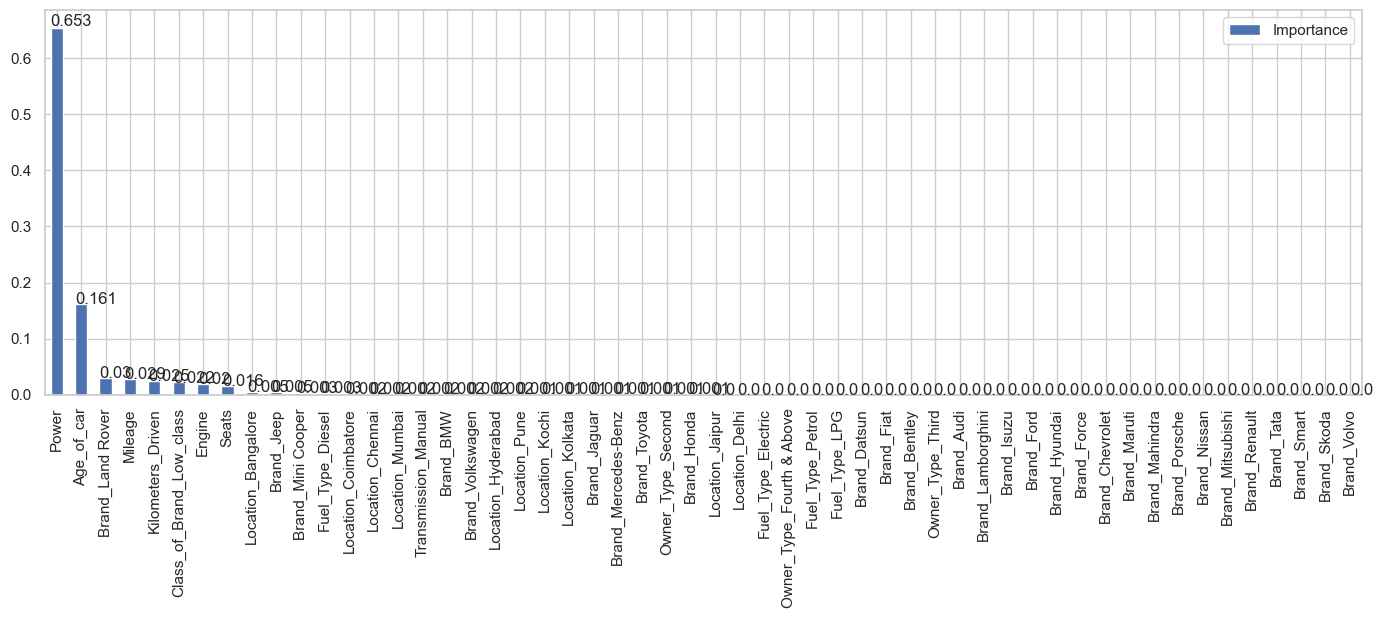

Importance
Power                         0.65300
Age_of_car                    0.16100
Brand_Land Rover              0.03000
Mileage                       0.02900
Kilometers_Driven             0.02500
Class_of_Brand_Low_class      0.02200
Engine                        0.02000
Seats                         0.01600
Location_Bangalore            0.00500
Brand_Jeep                    0.00500
Brand_Mini Cooper             0.00300
Fuel_Type_Diesel              0.00300
Location_Coimbatore           0.00200
Location_Chennai              0.00200
Location_Mumbai               0.00200
Transmission_Manual           0.00200
Brand_BMW                     0.00200
Brand_Volkswagen              0.00200
Location_Hyderabad            0.00200
Location_Pune                 0.00100
Location_Kochi                0.00100
Location_Kolkata              0.00100
Brand_Jaguar                  0.00100
Brand_Mercedes-Benz           0.00100
Brand_Toyota                  0.00100
Owner_Type_Second             0.00100
Brand_Honda                   0.00100
Location_Jaipur               0.00000
Location_Delhi                0.00000
Fuel_Type_Electric            0.00000
Owner_Type_Fourth & Above     0.00000
Fuel_Type_Petrol              0.00000
Fuel_Type_LPG                 0.00000
Brand_Datsun                  0.00000
Brand_Fiat                    0.00000
Brand_Bentley                 0.00000
Owner_Type_Third              0.00000
Brand_Audi                    0.00000
Brand_Lamborghini             0.00000
Brand_Isuzu                   0.00000
Brand_Ford                    0.00000
Brand_Hyundai                 0.00000
Brand_Force                   0.00000
Brand_Chevrolet               0.00000
Brand_Maruti                  0.00000
Brand_Mahindra                0.00000
Brand_Porsche                 0.00000
Brand_Nissan                  0.00000
Brand_Mitsubishi              0.00000
Brand_Renault                 0.00000
Brand_Tata                    0.00000
Brand_Smart                   0.00000
Brand_Skoda                   0.00000
Brand_Volvo                   0.00000

In [175]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state = 42)
model.fit(a,b)

#np.around(list(model.feature_importances_),3)

feat_importances = pd.DataFrame(np.around(list(model.feature_importances_),3), index=a.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
ax = feat_importances.plot(kind='bar', figsize=(17,5))
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()
feat_importances

Power, age, brand- Land Rover kilometers driven, Mileage, Class of Brand, Engine and Seats of the car are the most important features in determining Price of the car.

# 6.Model Building

### 6.1.Seperating data into features and target

In [176]:
features = Final_data_for_ML1.drop(['Price'], axis = 1)
target = Final_data_for_ML1 ['Price']

In [177]:
Final_data_for_ML1.columns

Index(['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Age_of_car',
       'Seats', 'Price', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third', 'Brand_Audi', 'Brand_BMW', 'Brand_Bentley',
       'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Force',
       'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Isuzu',
       'Brand_Jaguar', 'Brand_Jeep', 'Brand_Lamborghini', 'Brand_Land Rover',
       'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz',
       'Brand_Mini Cooper', 'Brand_Mitsubishi', 'Brand_Nissan',
       'Brand_Porsche', 'Brand_Renault', 'Brand_Skoda', 'Brand_Smart',
       'Brand_Tata', 'Brand_Toy

### 6.2.Train-test-split

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 6)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4213, 54)
(1806, 54)
(4213,)
(1806,)


In [179]:
X_train.head()

Kilometers_Driven  Mileage     Engine     Power  Age_of_car   Seats  \
2898              53000 16.55000 1968.00000 140.00000           9 5.00000   
592               71932 12.55000 2982.00000 168.50000          10 7.00000   
1995               3000 24.30000 1248.00000  88.50000           5 5.00000   
844              125000 20.54000 1598.00000 103.60000          10 5.00000   
5759              46707 17.00000 1086.00000  83.00000          16 5.00000   

      Location_Bangalore  Location_Chennai  Location_Coimbatore  \
2898               False             False                False   
592                False             False                False   
1995               False              True                False   
844                False             False                False   
5759               False             False                False   

      Location_Delhi  ...  Brand_Nissan  Brand_Porsche  Brand_Renault  \
2898           False  ...         False          False          False   
592             True  ...         False          False          False   
1995           False  ...         False          False          False   
844            False  ...         False          False          False   
5759           False  ...         False          False          False   

      Brand_Skoda  Brand_Smart  Brand_Tata  Brand_Toyota  Brand_Volkswagen  \
2898        False        False       False         False             False   
592         False        False       False          True             False   
1995        False        False       False         False             False   
844         False        False       False         False              True   
5759        False        False       False         False             False   

      Brand_Volvo  Class_of_Brand_Low_class  
2898        False                     False  
592         False                      True  
1995        False                      True  
844         False                     False  
5759        False                      True  

[5 rows x 54 columns]

In [180]:
X_train.columns

Index(['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Age_of_car',
       'Seats', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third', 'Brand_Audi', 'Brand_BMW', 'Brand_Bentley',
       'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Force',
       'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Isuzu',
       'Brand_Jaguar', 'Brand_Jeep', 'Brand_Lamborghini', 'Brand_Land Rover',
       'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz',
       'Brand_Mini Cooper', 'Brand_Mitsubishi', 'Brand_Nissan',
       'Brand_Porsche', 'Brand_Renault', 'Brand_Skoda', 'Brand_Smart',
       'Brand_Tata', 'Brand_Toyota', 'Br

### 6.3.Scaling of train data

In [181]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train, columns = features.columns)
X_train_scaled.head()

Kilometers_Driven  Mileage  Engine   Power  Age_of_car   Seats  \
0            0.06818  0.37399 0.25009 0.20122     0.23810 0.37500   
1            0.09262  0.22660 0.43878 0.25542     0.28571 0.62500   
2            0.00365  0.65954 0.11611 0.10327     0.04762 0.37500   
3            0.16111  0.52100 0.18124 0.13199     0.28571 0.37500   
4            0.06006  0.39057 0.08597 0.09281     0.57143 0.37500   

   Location_Bangalore  Location_Chennai  Location_Coimbatore  Location_Delhi  \
0             0.00000           0.00000              0.00000         0.00000   
1             0.00000           0.00000              0.00000         1.00000   
2             0.00000           1.00000              0.00000         0.00000   
3             0.00000           0.00000              0.00000         0.00000   
4             0.00000           0.00000              0.00000         0.00000   

   ...  Brand_Nissan  Brand_Porsche  Brand_Renault  Brand_Skoda  Brand_Smart  \
0  ...       0.00000        0.00000        0.00000      0.00000      0.00000   
1  ...       0.00000        0.00000        0.00000      0.00000      0.00000   
2  ...       0.00000        0.00000        0.00000      0.00000      0.00000   
3  ...       0.00000        0.00000        0.00000      0.00000      0.00000   
4  ...       0.00000        0.00000        0.00000      0.00000      0.00000   

   Brand_Tata  Brand_Toyota  Brand_Volkswagen  Brand_Volvo  \
0     0.00000       0.00000           0.00000      0.00000   
1     0.00000       1.00000           0.00000      0.00000   
2     0.00000       0.00000           0.00000      0.00000   
3     0.00000       0.00000           1.00000      0.00000   
4     0.00000       0.00000           0.00000      0.00000   

   Class_of_Brand_Low_class  
0                   0.00000  
1                   1.00000  
2                   1.00000  
3                   0.00000  
4                   1.00000  

[5 rows x 54 columns]

In [182]:
X_train_scaled.columns

Index(['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Age_of_car',
       'Seats', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third', 'Brand_Audi', 'Brand_BMW', 'Brand_Bentley',
       'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Force',
       'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Isuzu',
       'Brand_Jaguar', 'Brand_Jeep', 'Brand_Lamborghini', 'Brand_Land Rover',
       'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz',
       'Brand_Mini Cooper', 'Brand_Mitsubishi', 'Brand_Nissan',
       'Brand_Porsche', 'Brand_Renault', 'Brand_Skoda', 'Brand_Smart',
       'Brand_Tata', 'Brand_Toyota', 'Br

In [183]:
X_train_scaled.shape

(4213, 54)

#### GRID SEARCH ALGORITHIM IS USED IN THE GIVEN DATASET MODELS

### 6.4.Model-1---Linear Regression

In [184]:
# Default Linear Regression model without any tuning - base metric
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def mape(target, prediction):
    return np.mean(np.abs((target - prediction)) / target) * 100

def Adj_r2(features, Actual_target, Predicted_target):
    r2 = r2_score(Actual_target, Predicted_target)
    n = features.shape[0]
    k = features.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

Linear_Regression_default = LinearRegression()
Linear_Regression_default.fit(X_train, y_train)
Predictions_train_d = Linear_Regression_default.predict(X_train)
Predictions_test_d =Linear_Regression_default.predict(X_test)

print('Linear Regression default Model parameters:', Linear_Regression_default.get_params())
print('--------------------------------------------------')
print('\nLinear Regression default intercept :', Linear_Regression_default.intercept_)
print('\nLinear Regression default coefficients : ')
print('\n')
Coeficients = pd.DataFrame(Linear_Regression_default.coef_, index = features.columns, columns=['Coefficients'])
print(Coeficients)
print('--------------------------------------------------')
print('\n')
df1 = pd.DataFrame({'Model': ['Linear_Regression_default', 'Linear_Regression_default'],
                    'Data': ['Train', 'Test'],
                    'MSE': [mean_squared_error(y_train, Predictions_train_d), mean_squared_error(y_test, Predictions_test_d)],
                    'RMSE': [np.sqrt(mean_squared_error(y_train, Predictions_train_d)), np.sqrt(mean_squared_error(y_test, Predictions_test_d))],
                    'MAE': [mean_absolute_error(y_train, Predictions_train_d), mean_absolute_error(y_test, Predictions_test_d)],
                    'MAPE': [mape(y_train, Predictions_train_d),mape(y_test, Predictions_test_d)],
                   'R^2': [r2_score(y_train, Predictions_train_d), r2_score(y_test, Predictions_test_d)],
                    'Adj_R^2': [Adj_r2(X_train, y_train, Predictions_train_d), Adj_r2(X_test, y_test, Predictions_test_d)],
                   'Accuracy': [Linear_Regression_default.score(X_train, y_train), Linear_Regression_default.score(X_test, y_test) ]})
df1

Linear Regression default Model parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
--------------------------------------------------

Linear Regression default intercept : 20.203255726134017

Linear Regression default coefficients : 


                           Coefficients
Kilometers_Driven              -9.50120
Mileage                        -2.99968
Engine                         12.14218
Power                          41.13004
Age_of_car                    -19.56194
Seats                           0.43618
Location_Bangalore              1.53367
Location_Chennai                0.89264
Location_Coimbatore             2.16966
Location_Delhi                 -0.87223
Location_Hyderabad              1.49399
Location_Jaipur                 0.68392
Location_Kochi                 -0.40434
Location_Kolkata               -1.32418
Location_Mumbai                -1.03179
Location_Pune                   0.17493
Fuel_Type_Diesel               -0.03182
Fuel_Ty

Model   Data      MSE    RMSE     MAE     MAPE     R^2  \
0  Linear_Regression_default  Train 29.12564 5.39682 2.89269 58.44133 0.77644   
1  Linear_Regression_default   Test 25.09588 5.00958 2.90645 56.33410 0.77815   

   Adj_R^2  Accuracy  
0  0.77354   0.77644  
1  0.77131   0.77815

In [185]:
# GridSearchCV model-
Linear_Regression = LinearRegression()
from sklearn.model_selection import GridSearchCV
grid = {'fit_intercept':[True,False], 'copy_X':[True, False]}
GridSearch = GridSearchCV(Linear_Regression, grid, cv = 10, verbose = True)
GridSearch.fit(X_train, y_train)
#df = pd.DataFrame(GridSearch.cv_results_)
#print(df)
print('--------------------------------------------------')
print('\nGridSearchCV Best parameters:', GridSearch.best_params_)
print("GridSearch Best Score :",GridSearch.best_score_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
--------------------------------------------------

GridSearchCV Best parameters: {'copy_X': True, 'fit_intercept': True}
GridSearch Best Score : 0.7627796234813908


In [186]:
# Using GridSearchCV best parameters for model buliding
Linear_Regression = LinearRegression(**GridSearch.best_params_)

# Printing all parameters of the model:
print ('Linear_Regression model parameters:')
print(Linear_Regression.get_params())

Linear_Regression.fit(X_train, y_train)
Predictions_train = Linear_Regression.predict(X_train)
Predictions_test = Linear_Regression.predict(X_test)
print('--------------------------------------------------')
print('\nLinear Regression intercept :', Linear_Regression.intercept_)
print('\nLinear Regression coefficients : ')
print('\n')
Coeficients = pd.DataFrame(Linear_Regression.coef_, index = features.columns, columns=['Coefficients'])
print(Coeficients)
print('--------------------------------------------------')
print('\n')
df2 = pd.DataFrame({'Model': ['GridSearch_Linear_Regression', 'GridSearch_Linear_Regression'],
                    'Data': ['Train', 'Test'],
                    'MSE': [mean_squared_error(y_train, Predictions_train), mean_squared_error(y_test, Predictions_test)],
                    'RMSE': [np.sqrt(mean_squared_error(y_train, Predictions_train)), np.sqrt(mean_squared_error(y_test, Predictions_test))],
                    'MAE': [mean_absolute_error(y_train, Predictions_train), mean_absolute_error(y_test, Predictions_test)],
                    'MAPE': [mape(y_train, Predictions_train),mape(y_test, Predictions_test)],
                   'R^2': [r2_score(y_train, Predictions_train), r2_score(y_test, Predictions_test)],
                    'Adj_R^2': [Adj_r2(X_train, y_train, Predictions_train), Adj_r2(X_test, y_test, Predictions_test)],
                   'Accuracy': [Linear_Regression.score(X_train, y_train), Linear_Regression.score(X_test, y_test) ]})
df2

Linear_Regression model parameters:
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
--------------------------------------------------

Linear Regression intercept : 20.203255726134017

Linear Regression coefficients : 


                           Coefficients
Kilometers_Driven              -9.50120
Mileage                        -2.99968
Engine                         12.14218
Power                          41.13004
Age_of_car                    -19.56194
Seats                           0.43618
Location_Bangalore              1.53367
Location_Chennai                0.89264
Location_Coimbatore             2.16966
Location_Delhi                 -0.87223
Location_Hyderabad              1.49399
Location_Jaipur                 0.68392
Location_Kochi                 -0.40434
Location_Kolkata               -1.32418
Location_Mumbai                -1.03179
Location_Pune                   0.17493
Fuel_Type_Diesel               -0.03182
Fuel_Type_Electric             

Model   Data      MSE    RMSE     MAE     MAPE  \
0  GridSearch_Linear_Regression  Train 29.12564 5.39682 2.89269 58.44133   
1  GridSearch_Linear_Regression   Test 25.09588 5.00958 2.90645 56.33410   

      R^2  Adj_R^2  Accuracy  
0 0.77644  0.77354   0.77644  
1 0.77815  0.77131   0.77815

In [187]:
Linear_Regression_Result = pd.concat([df1, df2], ignore_index = True)
Linear_Regression_Result

Model   Data      MSE    RMSE     MAE     MAPE  \
0     Linear_Regression_default  Train 29.12564 5.39682 2.89269 58.44133   
1     Linear_Regression_default   Test 25.09588 5.00958 2.90645 56.33410   
2  GridSearch_Linear_Regression  Train 29.12564 5.39682 2.89269 58.44133   
3  GridSearch_Linear_Regression   Test 25.09588 5.00958 2.90645 56.33410   

      R^2  Adj_R^2  Accuracy  
0 0.77644  0.77354   0.77644  
1 0.77815  0.77131   0.77815  
2 0.77644  0.77354   0.77644  
3 0.77815  0.77131   0.77815

In [188]:
# Creating a dataframe for adding the result of final model - GridSearch Linear Regression model.
Collective_Result = pd.DataFrame(({'Model': ['Linear Regression'],
                    'MSE': [mean_squared_error(y_test, Predictions_test)],
                    'RMSE': [np.sqrt(mean_squared_error(y_test, Predictions_test))],
                    'MAE': [ mean_absolute_error(y_test, Predictions_test)],
                    'MAPE': [mape(y_test, Predictions_test)],
                   'R^2': [r2_score(y_test, Predictions_test)],
                    'Adj_R^2': [Adj_r2(X_test, y_test, Predictions_test)],
                   'Accuracy': [Linear_Regression.score(X_test, y_test)]}))

### 6.5.Model 2 -- Decision Tree Regression

In [189]:
# Default Decision Tree Regression model without any tuning - base metric
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def mape(target, prediction):
    return np.mean(np.abs((target - prediction)) / target) * 100

def Adj_r2(features, Actual_target, Predicted_target):
    r2 = r2_score(Actual_target, Predicted_target)
    n = features.shape[0]
    k = features.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

Decision_Tree_Regression_default = DecisionTreeRegressor()
Decision_Tree_Regression_default.fit(X_train, y_train)
Predictions_train_d = Decision_Tree_Regression_default.predict(X_train)
Predictions_test_d =Decision_Tree_Regression_default.predict(X_test)

print('Decision Tree Regression default Model parameters:', Decision_Tree_Regression_default.get_params())
print('--------------------------------------------------')
print('\n')
df1 = pd.DataFrame({'Model': ['Decision_Tree_Regression_default', 'Decision_Tree_Regression_default'],
                    'Data': ['Train', 'Test'],
                    'MSE': [mean_squared_error(y_train, Predictions_train_d), mean_squared_error(y_test, Predictions_test_d)],
                    'RMSE': [np.sqrt(mean_squared_error(y_train, Predictions_train_d)), np.sqrt(mean_squared_error(y_test, Predictions_test_d))],
                    'MAE': [mean_absolute_error(y_train, Predictions_train_d), mean_absolute_error(y_test, Predictions_test_d)],
                    'MAPE': [mape(y_train, Predictions_train_d),mape(y_test, Predictions_test_d)],
                   'R^2': [r2_score(y_train, Predictions_train_d), r2_score(y_test, Predictions_test_d)],
                    'Adj_R^2': [Adj_r2(X_train, y_train, Predictions_train_d), Adj_r2(X_test, y_test, Predictions_test_d)],
                   'Accuracy': [Decision_Tree_Regression_default.score(X_train, y_train), Decision_Tree_Regression_default.score(X_test, y_test) ]})
df1

Decision Tree Regression default Model parameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}
--------------------------------------------------




Model   Data      MSE    RMSE     MAE     MAPE  \
0  Decision_Tree_Regression_default  Train  0.00021 0.01461 0.00079  0.01302   
1  Decision_Tree_Regression_default   Test 14.62931 3.82483 1.82133 21.03435   

      R^2  Adj_R^2  Accuracy  
0 1.00000  1.00000   1.00000  
1 0.87068  0.86669   0.87068

In [190]:
# GridSearchCV model-
import time
start = time.time()

Decision_Tree_Regression = DecisionTreeRegressor(random_state = 42)
from sklearn.model_selection import GridSearchCV

grid = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 'splitter': ['best', 'random'],
       'max_depth': range(1,10), 'max_features': ['auto', 'sqrt', 'log2'] }

GridSearch = GridSearchCV(Decision_Tree_Regression, grid, cv = 10, verbose = True)
GridSearch.fit(X_train, y_train)
print('GridSearchCV Best parameters:', GridSearch.best_params_)
print("GridSearch Best Score :",GridSearch.best_score_)

end = time.time()
print('Time_lapsed :',end - start)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
GridSearchCV Best parameters: {'criterion': 'squared_error', 'max_depth': 9, 'max_features': 'sqrt', 'splitter': 'best'}
GridSearch Best Score : 0.7316540691226793
Time_lapsed : 74.68504691123962


In [191]:
# Using GridSearchCV best parameters for model buliding
Decision_Tree_Regression = DecisionTreeRegressor( random_state = 42, **GridSearch.best_params_)

# Printing all parameters of the model:
print ('Decision Tree Regression model parameters:')
print(Decision_Tree_Regression.get_params())

Decision_Tree_Regression.fit(X_train, y_train)
Predictions_train = Decision_Tree_Regression.predict(X_train)
Predictions_test = Decision_Tree_Regression.predict(X_test)
print('--------------------------------------------------')
print('\n')
df2 = pd.DataFrame({'Model': ['GridSearch_Decision_Tree_Regression', 'GridSearch_Decision_Tree_Regression'],
                    'Data': ['Train', 'Test'],
                    'MSE': [mean_squared_error(y_train, Predictions_train), mean_squared_error(y_test, Predictions_test)],
                    'RMSE': [np.sqrt(mean_squared_error(y_train, Predictions_train)), np.sqrt(mean_squared_error(y_test, Predictions_test))],
                    'MAE': [mean_absolute_error(y_train, Predictions_train), mean_absolute_error(y_test, Predictions_test)],
                    'MAPE': [mape(y_train, Predictions_train),mape(y_test, Predictions_test)],
                   'R^2': [r2_score(y_train, Predictions_train), r2_score(y_test, Predictions_test)],
                    'Adj_R^2': [Adj_r2(X_train, y_train, Predictions_train), Adj_r2(X_test, y_test, Predictions_test)],
                   'Accuracy': [Decision_Tree_Regression.score(X_train, y_train), Decision_Tree_Regression.score(X_test, y_test) ]})
df2


Decision Tree Regression model parameters:
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 9, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
--------------------------------------------------




Model   Data      MSE    RMSE     MAE  \
0  GridSearch_Decision_Tree_Regression  Train 19.73492 4.44240 2.35587   
1  GridSearch_Decision_Tree_Regression   Test 25.34947 5.03483 2.71738   

      MAPE     R^2  Adj_R^2  Accuracy  
0 31.86632 0.84852  0.84656   0.84852  
1 35.57599 0.77591  0.76900   0.77591

In [192]:
Decision_Tree_Regression_Result = pd.concat([df1, df2], ignore_index = True)
Decision_Tree_Regression_Result

Model   Data      MSE    RMSE     MAE  \
0     Decision_Tree_Regression_default  Train  0.00021 0.01461 0.00079   
1     Decision_Tree_Regression_default   Test 14.62931 3.82483 1.82133   
2  GridSearch_Decision_Tree_Regression  Train 19.73492 4.44240 2.35587   
3  GridSearch_Decision_Tree_Regression   Test 25.34947 5.03483 2.71738   

      MAPE     R^2  Adj_R^2  Accuracy  
0  0.01302 1.00000  1.00000   1.00000  
1 21.03435 0.87068  0.86669   0.87068  
2 31.86632 0.84852  0.84656   0.84852  
3 35.57599 0.77591  0.76900   0.77591

In [193]:
# Creating a dataframe for adding the result of final model - GridSearch Decision_Tree Regression model.
CR2 = pd.DataFrame(({'Model': ['Decision Tree Regression'],
                    'MSE': [mean_squared_error(y_test, Predictions_test)],
                    'RMSE': [np.sqrt(mean_squared_error(y_test, Predictions_test))],
                    'MAE': [ mean_absolute_error(y_test, Predictions_test)],
                    'MAPE': [mape(y_test, Predictions_test)],
                   'R^2': [r2_score(y_test, Predictions_test)],
                    'Adj_R^2': [Adj_r2(X_test, y_test, Predictions_test)],
                   'Accuracy': [Decision_Tree_Regression.score(X_test, y_test)]}))
Collective_Result = pd.concat([Collective_Result, CR2], ignore_index = True)

### 6.6.Model 3---Random Forest Regression

In [194]:
# Default Random_Forest Regression model without any tuning - base metric
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def mape(target, prediction):
    return np.mean(np.abs((target - prediction)) / target) * 100

def Adj_r2(features, Actual_target, Predicted_target):
    r2 = r2_score(Actual_target, Predicted_target)
    n = features.shape[0]
    k = features.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

Random_Forest_Regression_default = RandomForestRegressor()
Random_Forest_Regression_default.fit(X_train, y_train)
Predictions_train_d = Random_Forest_Regression_default.predict(X_train)
Predictions_test_d =Random_Forest_Regression_default.predict(X_test)

print('Random Forest Regression default Model parameters:', Random_Forest_Regression_default.get_params())
print('--------------------------------------------------')
print('\n')
df1 = pd.DataFrame({'Model': ['Random_Forest_Regression_default', 'Random_Forest_Regression_default'],
                    'Data': ['Train', 'Test'], 
                    'MSE': [mean_squared_error(y_train, Predictions_train_d), mean_squared_error(y_test, Predictions_test_d)],
                    'RMSE': [np.sqrt(mean_squared_error(y_train, Predictions_train_d)), np.sqrt(mean_squared_error(y_test, Predictions_test_d))],
                    'MAE': [mean_absolute_error(y_train, Predictions_train_d), mean_absolute_error(y_test, Predictions_test_d)],
                    'MAPE': [mape(y_train, Predictions_train_d),mape(y_test, Predictions_test_d)],
                   'R^2': [r2_score(y_train, Predictions_train_d), r2_score(y_test, Predictions_test_d)],
                    'Adj_R^2': [Adj_r2(X_train, y_train, Predictions_train_d), Adj_r2(X_test, y_test, Predictions_test_d)],
                   'Accuracy': [Random_Forest_Regression_default.score(X_train, y_train), Random_Forest_Regression_default.score(X_test, y_test) ]})
df1

Random Forest Regression default Model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
--------------------------------------------------




Model   Data     MSE    RMSE     MAE     MAPE  \
0  Random_Forest_Regression_default  Train 1.97861 1.40663 0.55117  6.30783   
1  Random_Forest_Regression_default   Test 7.83696 2.79946 1.34814 15.81061   

      R^2  Adj_R^2  Accuracy  
0 0.98481  0.98462   0.98481  
1 0.93072  0.92858   0.93072

In [195]:
# GridSearchCV model-
import time
start = time.time()

Random_Forest_Regression = RandomForestRegressor(random_state = 42)
from sklearn.model_selection import GridSearchCV

grid = {'n_estimators': [100, 200, 300], 'max_depth': range(1,10, 2), 'max_features': ['auto', 'sqrt', 'log2'] }

GridSearch = GridSearchCV(Random_Forest_Regression, grid, cv = 10, verbose = True)
GridSearch.fit(X_train, y_train) 
print('GridSearchCV Best parameters:', GridSearch.best_params_)
print("GridSearch Best Score :",GridSearch.best_score_)

end = time.time()
print('Time_lapsed :',end - start)

Fitting 10 folds for each of 45 candidates, totalling 450 fits
GridSearchCV Best parameters: {'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 200}
GridSearch Best Score : 0.848438017997567
Time_lapsed : 205.42787909507751


In [196]:
# Using GridSearchCV best parameters for model buliding
Random_Forest_Regression = RandomForestRegressor(random_state = 42,  **GridSearch.best_params_)

# Printing all parameters of the model: 
print ('RandomForest Regression model parameters:')
print(Random_Forest_Regression.get_params())

Random_Forest_Regression.fit(X_train, y_train)
Predictions_train = Random_Forest_Regression.predict(X_train)
Predictions_test = Random_Forest_Regression.predict(X_test)
print('--------------------------------------------------')
print('\n')
df2 = pd.DataFrame({'Model': ['GridSearch_Random_Forest_Regression', 'GridSearch_Random_Forest_Regression'],
                    'Data': ['Train', 'Test'], 
                    'MSE': [mean_squared_error(y_train, Predictions_train), mean_squared_error(y_test, Predictions_test)],
                    'RMSE': [np.sqrt(mean_squared_error(y_train, Predictions_train)), np.sqrt(mean_squared_error(y_test, Predictions_test))],
                    'MAE': [mean_absolute_error(y_train, Predictions_train), mean_absolute_error(y_test, Predictions_test)],
                    'MAPE': [mape(y_train, Predictions_train),mape(y_test, Predictions_test)],
                   'R^2': [r2_score(y_train, Predictions_train), r2_score(y_test, Predictions_test)],
                    'Adj_R^2': [Adj_r2(X_train, y_train, Predictions_train), Adj_r2(X_test, y_test, Predictions_test)],
                   'Accuracy': [Random_Forest_Regression.score(X_train, y_train), Random_Forest_Regression.score(X_test, y_test) ]})
df2

RandomForest Regression model parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 9, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
--------------------------------------------------




Model   Data      MSE    RMSE     MAE  \
0  GridSearch_Random_Forest_Regression  Train 11.32998 3.36600 1.81661   
1  GridSearch_Random_Forest_Regression   Test 14.05251 3.74867 1.98281   

      MAPE     R^2  Adj_R^2  Accuracy  
0 28.39750 0.91304  0.91191   0.91304  
1 29.39498 0.87578  0.87194   0.87578

In [197]:
Random_Forest_Regression_Result = pd.concat([df1, df2], ignore_index = True)
Random_Forest_Regression_Result

Model   Data      MSE    RMSE     MAE  \
0     Random_Forest_Regression_default  Train  1.97861 1.40663 0.55117   
1     Random_Forest_Regression_default   Test  7.83696 2.79946 1.34814   
2  GridSearch_Random_Forest_Regression  Train 11.32998 3.36600 1.81661   
3  GridSearch_Random_Forest_Regression   Test 14.05251 3.74867 1.98281   

      MAPE     R^2  Adj_R^2  Accuracy  
0  6.30783 0.98481  0.98462   0.98481  
1 15.81061 0.93072  0.92858   0.93072  
2 28.39750 0.91304  0.91191   0.91304  
3 29.39498 0.87578  0.87194   0.87578

As in default model, the RMSE are very high and Adj_R^2 are very low, we cannot select this model. GridSearch model is performing better. So if selected, we will select GridSearch Lasso Regression model.

In [198]:
# Creating a dataframe for adding the result of final model - Default Randon Forest Model.
CR3 = pd.DataFrame(({'Model': ['Random Forest Regression'], 
                    'MSE': [mean_squared_error(y_test, Predictions_test_d)],
                    'RMSE': [np.sqrt(mean_squared_error(y_test, Predictions_test_d))],
                    'MAE': [ mean_absolute_error(y_test, Predictions_test_d)],
                    'MAPE': [mape(y_test, Predictions_test_d)],
                   'R^2': [r2_score(y_test, Predictions_test_d)],
                    'Adj_R^2': [Adj_r2(X_test, y_test, Predictions_test_d)],
                   'Accuracy': [Random_Forest_Regression_default.score(X_test, y_test)]}))
Collective_Result = pd.concat([Collective_Result, CR3], ignore_index = True)

### 6.7.Model 4---Neural Network Regression Model

In [199]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def mape(target, prediction):
    return np.mean(np.abs((target - prediction)) / target) * 100

def Adj_r2(features, Actual_target, Predicted_target):
    r2 = r2_score(Actual_target, Predicted_target)
    n = features.shape[0]
    k = features.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

Neural_Network_Regression_default = MLPRegressor()
Neural_Network_Regression_default.fit(X_train, y_train)
Predictions_train_d = Neural_Network_Regression_default.predict(X_train)
Predictions_test_d =Neural_Network_Regression_default.predict(X_test)

print('Neural Network Regression default Model parameters:', Neural_Network_Regression_default.get_params())
print('--------------------------------------------------')
print('\n')
df1 = pd.DataFrame({'Model': ['Neural_Network_Regression_default', 'Neural_Network_Regression_default'],
                    'Data': ['Train', 'Test'], 
                    'MSE': [mean_squared_error(y_train, Predictions_train_d), mean_squared_error(y_test, Predictions_test_d)],
                    'RMSE': [np.sqrt(mean_squared_error(y_train, Predictions_train_d)), np.sqrt(mean_squared_error(y_test, Predictions_test_d))],
                    'MAE': [mean_absolute_error(y_train, Predictions_train_d), mean_absolute_error(y_test, Predictions_test_d)],
                    'MAPE': [mape(y_train, Predictions_train_d),mape(y_test, Predictions_test_d)],
                   'R^2': [r2_score(y_train, Predictions_train_d), r2_score(y_test, Predictions_test_d)],
                    'Adj_R^2': [Adj_r2(X_train, y_train, Predictions_train_d), Adj_r2(X_test, y_test, Predictions_test_d)],
                   'Accuracy': [Neural_Network_Regression_default.score(X_train, y_train), 
                                Neural_Network_Regression_default.score(X_test, y_test) ]})
df1

Neural Network Regression default Model parameters: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
--------------------------------------------------




Model   Data      MSE    RMSE     MAE     MAPE  \
0  Neural_Network_Regression_default  Train 11.72796 3.42461 1.62264 22.16974   
1  Neural_Network_Regression_default   Test 12.66656 3.55901 1.82859 24.97126   

      R^2  Adj_R^2  Accuracy  
0 0.90998  0.90881   0.90998  
1 0.88803  0.88457   0.88803

In [ ]:
# GridSearchCV model-
import time
start = time.time()

Neural_Network_Regression = MLPRegressor()
from sklearn.model_selection import GridSearchCV

grid = {'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)], 'max_iter': [50, 100], 'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam']}

GridSearch = GridSearchCV(Neural_Network_Regression, grid, cv = 10, verbose = True)
GridSearch.fit(X_train, y_train) 
print('GridSearchCV Best parameters:', GridSearch.best_params_)
print("GridSearch Best Score :",GridSearch.best_score_)

end = time.time()
print('Time_lapsed :',end - start)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


In [ ]:
# Using GridSearchCV best parameters for model buliding
Neural_Network_Regression = MLPRegressor( **GridSearch.best_params_)

# Printing all parameters of the model: 
print ('Neural_Network_Regression model parameters:')
print(Neural_Network_Regression.get_params())

Neural_Network_Regression.fit(X_train, y_train)
Predictions_train = Neural_Network_Regression.predict(X_train)
Predictions_test = Neural_Network_Regression.predict(X_test)
print('--------------------------------------------------')
print('\n')
df2 = pd.DataFrame({'Model': ['GridSearch_Neural_Network_Regression', 'GridSearch_Neural_Network_Regression'],
                    'Data': ['Train', 'Test'], 
                    'MSE': [mean_squared_error(y_train, Predictions_train), mean_squared_error(y_test, Predictions_test)],
                    'RMSE': [np.sqrt(mean_squared_error(y_train, Predictions_train)), np.sqrt(mean_squared_error(y_test, Predictions_test))],
                    'MAE': [mean_absolute_error(y_train, Predictions_train), mean_absolute_error(y_test, Predictions_test)],
                    'MAPE': [mape(y_train, Predictions_train),mape(y_test, Predictions_test)],
                   'R^2': [r2_score(y_train, Predictions_train), r2_score(y_test, Predictions_test)],
                    'Adj_R^2': [Adj_r2(X_train, y_train, Predictions_train), Adj_r2(X_test, y_test, Predictions_test)],
                   'Accuracy': [Neural_Network_Regression.score(X_train, y_train), Neural_Network_Regression.score(X_test, y_test) ]})
df2

In [ ]:
Neural_Network_Regression_Result = pd.concat([df1, df2], ignore_index = True)
Neural_Network_Regression_Result

In [ ]:
# Creating a dataframe for adding the result of final model - GridSearch Neural Network Regression:
CR4 = pd.DataFrame(({'Model': ['Neural Network Regression'], 
                    'MSE': [mean_squared_error(y_test, Predictions_test_d)],
                    'RMSE': [np.sqrt(mean_squared_error(y_test, Predictions_test_d))],
                    'MAE': [ mean_absolute_error(y_test, Predictions_test_d)],
                    'MAPE': [mape(y_test, Predictions_test_d)],
                   'R^2': [r2_score(y_test, Predictions_test_d)],
                    'Adj_R^2': [Adj_r2(X_test, y_test, Predictions_test_d)],
                   'Accuracy': [Neural_Network_Regression.score(X_test, y_test)]}))
Collective_Result = pd.concat([Collective_Result, CR4], ignore_index = True)

### 6.7.Model 4---SVM

In [ ]:
from sklearn import svm
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def mape(target, prediction):
    return np.mean(np.abs((target - prediction)) / target) * 100

def Adj_r2(features, Actual_target, Predicted_target):
    r2 = r2_score(Actual_target, Predicted_target)
    n = features.shape[0]
    k = features.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

SVR_default = svm.SVR()
SVR_default.fit(X_train, y_train)
Predictions_train_d = SVR_default.predict(X_train)
Predictions_test_d =SVR_default.predict(X_test)

print('SVR default Model parameters:', SVR_default.get_params())
print('--------------------------------------------------')
print('\n')
df1 = pd.DataFrame({'Model': ['SVR_default', 'SVR_default'],
                    'Data': ['Train', 'Test'], 
                    'MSE': [mean_squared_error(y_train, Predictions_train_d), mean_squared_error(y_test, Predictions_test_d)],
                    'RMSE': [np.sqrt(mean_squared_error(y_train, Predictions_train_d)), np.sqrt(mean_squared_error(y_test, Predictions_test_d))],
                    'MAE': [mean_absolute_error(y_train, Predictions_train_d), mean_absolute_error(y_test, Predictions_test_d)],
                    'MAPE': [mape(y_train, Predictions_train_d),mape(y_test, Predictions_test_d)],
                   'R^2': [r2_score(y_train, Predictions_train_d), r2_score(y_test, Predictions_test_d)],
                    'Adj_R^2': [Adj_r2(X_train, y_train, Predictions_train_d), Adj_r2(X_test, y_test, Predictions_test_d)],
                   'Accuracy': [SVR_default.score(X_train, y_train), SVR_default.score(X_test, y_test) ]})
df1

In [ ]:
# GridSearchCV model-
import time
start = time.time()

SVR = svm.SVR()
from sklearn.model_selection import GridSearchCV

grid = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01],'kernel': ['rbf', 'poly', 'sigmoid']}

GridSearch = GridSearchCV(SVR, grid, cv = 10, verbose = True)
GridSearch.fit(X_train, y_train) 
print('GridSearchCV Best parameters:', GridSearch.best_params_)
print("GridSearch Best Score :",GridSearch.best_score_)

end = time.time()
print('Time_lapsed :',end - start)

In [ ]:
# Using GridSearchCV best parameters for model buliding
SVR = svm.SVR( **GridSearch.best_params_)

# Printing all parameters of the model: 
print ('SVR model parameters:')
print(SVR.get_params())

SVR.fit(X_train, y_train)
Predictions_train = SVR.predict(X_train)
Predictions_test = SVR.predict(X_test)
print('--------------------------------------------------')
print('\n')
df2 = pd.DataFrame({'Model': ['GridSearch_SVR', 'GridSearch_SVR'],
                    'Data': ['Train', 'Test'], 
                    'MSE': [mean_squared_error(y_train, Predictions_train), mean_squared_error(y_test, Predictions_test)],
                    'RMSE': [np.sqrt(mean_squared_error(y_train, Predictions_train)), np.sqrt(mean_squared_error(y_test, Predictions_test))],
                    'MAE': [mean_absolute_error(y_train, Predictions_train), mean_absolute_error(y_test, Predictions_test)],
                    'MAPE': [mape(y_train, Predictions_train),mape(y_test, Predictions_test)],
                   'R^2': [r2_score(y_train, Predictions_train), r2_score(y_test, Predictions_test)],
                    'Adj_R^2': [Adj_r2(X_train, y_train, Predictions_train), Adj_r2(X_test, y_test, Predictions_test)],
                   'Accuracy': [SVR.score(X_train, y_train), SVR.score(X_test, y_test) ]})
df2

In [ ]:
SVR_Result = pd.concat([df1, df2], ignore_index = True)
SVR_Result

In [ ]:
# Creating a dataframe for adding the result of final model - GridSearch_SVR
CR5 = pd.DataFrame(({'Model': ['SVR Regression'], 
                    'MSE': [mean_squared_error(y_test, Predictions_test)],
                    'RMSE': [np.sqrt(mean_squared_error(y_test, Predictions_test))],
                    'MAE': [ mean_absolute_error(y_test, Predictions_test)],
                    'MAPE': [mape(y_test, Predictions_test)],
                   'R^2': [r2_score(y_test, Predictions_test)],
                    'Adj_R^2': [Adj_r2(X_test, y_test, Predictions_test)],
                   'Accuracy': [SVR.score(X_test, y_test)]}))
Collective_Result = pd.concat([Collective_Result, CR5], ignore_index = True)

# 7.Final Selection of Model

In [ ]:
Collective_Result

In [ ]:
print('Best Adj_R^2:')
Collective_Result.loc[Collective_Result['Adj_R^2'].idxmax()]

In [ ]:
Collective= Collective_Result.groupby('Model')['Accuracy'].mean().sort_values(ascending=False)
fig = px.bar(Collective, color = Collective.index )
fig.show()

In [ ]:
axis = Collective_Result.groupby('Model')[['R^2']].mean().plot(figsize=(10,5),marker='o',color='r')
plt.title("MODELS R^2 ", fontsize=20,ha='center')

In [ ]:
Collective_Result.groupby("Model")["Accuracy"].sum().plot.pie(autopct="%1.0f%%")


As we can clearly seen Accuracy of Netural model is more

In [ ]:
print('Best Adj_R^2:')
Collective_Result.loc[Collective_Result['Adj_R^2'].idxmax()]

In [ ]:
# input features and target
print(features.shape)
print(target.shape)

Final_Regression_model = RandomForestRegressor(random_state = 42, n_estimators= 10)

print ('Final_LGBM_Regression_model parameters:')
print(Final_Regression_model.get_params())

Final_Regression_model.fit(features, target)
Predictions = Final_Regression_model.predict(features)
print('-------------------------------------------------------')
print('Performance of LGBM Regression Model')
final_df = pd.DataFrame(({'MSE': [mean_squared_error(target, Predictions)],
                    'RMSE': [np.sqrt(mean_squared_error(target, Predictions))],
                    'MAE': [ mean_absolute_error(target, Predictions)],
                    'MAPE': [mape(target, Predictions)],
                   'R^2': [r2_score(target, Predictions)],
                    'Adj_R^2': [Adj_r2(features, target, Predictions)],
                   'Accuracy': [Final_Regression_model.score(features, target)]}))
final_df

## Working on unseen data

### 7.1.Loading on unseen data

In [ ]:
test_data = pd.read_csv('data/test-data.csv')
test_data.head()

In [ ]:
test_data.shape

In [ ]:
test_data.info()

In [ ]:
test_data.info()

### 7.2.Preprocessing Mileage, Engine, Power ans Seats columns.

In [ ]:
test_data['Mileage'] = test_data['Mileage'].str.rstrip('kmpl')
test_data['Mileage'] = test_data['Mileage'].str.rstrip('km/g')
test_data['Mileage'] = test_data['Mileage'].astype('float')
test_data.loc[test_data["Mileage"]==0.0,'Mileage']=np.nan

test_data['Engine'] = test_data['Engine'].str.rstrip('CC')
test_data['Engine'] = test_data['Engine'].astype('float')
test_data.loc[test_data["Engine"]==0.0,'Engine']=np.nan

test_data['Power'] = test_data['Power'].str.rstrip('bhp')
test_data['Power'] = test_data['Power'].replace(regex="null", value = np.nan)
test_data['Power'] = test_data['Power'].astype('float')
test_data.loc[test_data["Power"]==0.0,'Power']=np.nan

test_data.loc[test_data["Seats"]==0.0,'Seats']=np.nan

### 7.3.Adding Age, Brand and Model columns

In [ ]:
test_data['Current_year'] =2023
test_data['Age_of_car'] = test_data['Current_year'] - test_data['Year']
test_data.drop('Current_year', axis = 1, inplace = True)

new_df = test_data['Name'].str.split(" ", n = 1, expand = True)
test_data['Brand']= new_df[0]
test_data['Model']= new_df[1]

### 7.4.Adding Class_of_Brand column

In [ ]:
test_data['Brand'].unique()

In [ ]:
test_data.loc[test_data.Brand == 'ISUZU', 'Brand'] = 'Isuzu'
test_data['Brand'].nunique()

In [ ]:
Low_class = ['Maruti', 'Hyundai', 'Honda', 'Toyota', 'Tata', 'Mitsubishi', 'Renault', 'Mahindra', 'Ford',
             'Datsun', 'Chevrolet', 'Skoda', 'Fiat', 'Isuzu', 'OpelCorsa' ]
High_class = ['Audi', 'Nissan', 'Volkswagen', 'Land Rover', 'Mercedes-Benz', 'BMW', 'Porsche',
              'Jaguar', 'Volvo', 'Mini Cooper','Jeep', 'Bentley', 'Lamborghini']
print(len(Low_class))
print(len(High_class))

In [ ]:
def class_of_Brand(x):
    if x in Low_class:
        return "Low_class"
    else:
        return "High_class"

In [ ]:
test_data['Class_of_Brand'] = test_data['Brand'].apply(lambda x: class_of_Brand(x))
test_data.head()

### 7.5.Converting datatypes

In [ ]:
test_data['Location'] = test_data['Location'].astype('category')
test_data['Fuel_Type'] = test_data['Fuel_Type'].astype('category')
test_data['Transmission'] = test_data['Transmission'].astype('category')
test_data['Owner_Type'] = test_data['Owner_Type'].astype('category')
test_data['Class_of_Brand'] = test_data['Class_of_Brand'].astype('category')

In [ ]:
test_data.info()

### 7.6.Checking duplicate rows

In [ ]:
duplicate_rows = test_data.duplicated()
print(duplicate_rows.any())
test_data.drop_duplicates(inplace = True)
print(test_data.shape)

### 7.7.Outliers Treatment

In [ ]:
train_data_numerical_columns = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Age_of_car']
for column in train_data_numerical_columns:
    print('Maximum value in train data', column, 'after outlier treatment: ', train_data[column].max())

print('-------------------------------------------------------------')

test_data_numerical_columns = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Age_of_car']
for column in test_data_numerical_columns:
    print('Maximum value in test data', column, 'before outlier treatment: ', test_data[column].max())

As the test data outliers are near to max values in train data columns, we will not treat test data outliers.



### 7.8.Missing Value Treatment

In [ ]:
test_data.isna().sum()

In [ ]:
print('Percentage of Missing values:')
print('-----------------------------')
test_data.isnull().sum()/len(test_data)*100

As the missing value percentage in New_Price is high, we will drop New_Price column. For numerical columns, we will fill missing value by median. For categorical cloumn, we will fill missing value by mode.

In [ ]:
test_data['Mileage'] = test_data['Mileage'].fillna(test_data['Mileage'].median())
test_data['Engine'] = test_data['Engine'].fillna(test_data['Engine'].median())
test_data['Power'] = test_data['Power'].fillna(test_data['Power'].median())
test_data['Seats'] = test_data['Seats'].fillna(test_data['Seats'].mode()[0])
test_data.drop(['New_Price'], axis = 1, inplace = True)

In [ ]:
test_data.isna().sum()

### 7.9.Feature Selection

In [ ]:
Selected_columns = ['Location', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine',
                    'Power', 'Seats', 'Age_of_car', 'Brand', 'Class_of_Brand']
Final_test_data_for_ML = test_data[Selected_columns]
Final_test_data_for_ML.head()

### 7.10.Feature Encoding

In [ ]:
Final_test_data_for_ML = pd.get_dummies(Final_test_data_for_ML,
                                   columns=['Location', 'Fuel_Type','Transmission','Owner_Type','Brand', 'Class_of_Brand'],
                                    drop_first=True)
Final_test_data_for_ML.head()

In [ ]:
Final_test_data_for_ML['Brand_Force'] = 0
Final_test_data_for_ML['Brand_Smart'] = 0
Final_test_data_for_ML['Brand_Ambassador'] = 0

In [ ]:
Final_test_data_for_ML.shape

### 7.11.Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
Scalar = MinMaxScaler()
Final_test_data_for_ML = Scalar.fit_transform(Final_test_data_for_ML)

### 7.12.Run the model on all the inputs from unseen data and return the prediction

In [ ]:
Prediction=Final_Regression_model.predict(Final_test_data_for_ML)
Prediction_Result=pd.DataFrame(Prediction, columns=['Predicted_Price'])
print(Prediction_Result)

# 8.LOAD THE MODEL

In [ ]:
import pickle
file = open('car_price_prediction_model.pkl', 'wb')
pickle.dump(Final_Regression_model, file)

# 9.CONCLUSION

The selected model accurately predicts car prices, with strong performance on key metrics like RMSE and R-squared. Features such as Age_of_car, Kilometers_Driven, and Engine had the highest impact on price predictions. The model is well-suited for real-world applications, providing reliable insights for price estimation

-----------------------------------------------------------------------------------------------------------END-------------------------------------------------------------------------------------------------------------